# Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

* без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
  
  
* с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

# Введение


**Целью работы** является проведение анализа данных о поездках на самокатах и проверка гипотез о влиянии подписки на время поездки, расстояние и выручку. Исследование будет проведено на основе информации содержащейся в трёх источниках.

**Описание данных**
* *Информацию о пользователях* содержит:

  - уникальный идентификатор пользователя - *user_id*
  - имя пользователя - *name*
  - возраст - *age*
  - город - *city*	
  - тип подписки - *subscription_type (free, ultra)*


* *Информацию о поездках* содержит:

  - уникальный идентификатор пользователя - *user_id*
  - расстояние, которое пользователь проехал в текущей сессии (в метрах) - *distance*
  - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку» - *duration*
  - дата совершения поездки - *date*	


* *Информацию о подписках* содержит:

  - тип подписки - *subscription_type*
  - стоимость одной минуты поездки по данной подписке - *minute_price*
  - стоимость начала поездки - *start_ride_price*
  - стоимость ежемесячного платежа - *subscription_fee*

Проект будет выполнен по плану, представленному ниже.

# План работы


1. [**Загрузка данных.**](#1-bullet) 


2. [**Предобратка данных.**](#2-bullet)

  - Приведение столбца date к типу даты pandas.
 
  - Создание нового столбца с номером месяца на основе столбца date.
  
  - Проверка наличия пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.


3. [**Исследовательский анализ данных.**](#3-bullet)

Описание и визуализация общей информации о пользователях и поездках:
  - частота встречаемости городов;
  - соотношение пользователей с подпиской и без подписки;
  - возраст пользователей;
  - расстояние, которое пользователь преодолел за одну поездку;
  - продолжительность поездок.

4. [**Объединение данных.**](#4-bullet)

  1) Объединение данных о пользователях, поездках и подписках в один датафрейм.
  2) Создание двух дополнительных датафреймов из датафрейма, созданного на этапе 4.1:
  - c данными о пользователях без подписки;
  - с данными о пользователях с подпиской.
  
  3) Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.
   

5. [**Подсчёт выручки**](#5-bullet)

  1) Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными
  2) Добавление столбца с помесячной выручкой, которую принёс каждый пользователь
  
6. [**Проверка гипотез**](#6-bullet)

  1) Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
  
  2) Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу.
  
  3) Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.
  
  4) Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Опишем необходимый тест.

7. [**Распределения**](#7-bullet)

  1) Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %? Проверим гипотезу.
  
  2) Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.
  
8. [**Общий вывод**](#8-bullet)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from scipy import stats as st

from scipy.stats import binom

from scipy.stats import norm

from scipy.stats import poisson

from math import sqrt

import warnings

In [2]:
warnings.filterwarnings("ignore")

<a class='anchor' id='1-bullet'></a>
## Загрузка данных

##### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы

In [3]:
# считаем данные о пользователях из файла в переменную 'data_users'
try:
    data_users = pd.read_csv('/datasets/users_go.csv', sep=',')
except:
    data_users = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Статистический анализ данных\users_go.csv", sep=',')
    
# считаем данные о поездках из файла в переменную 'data_riders'
try:
    data_riders = pd.read_csv('/datasets/rides_go.csv', sep=',')
except:
    data_riders = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Статистический анализ данных\rides_go.csv", sep=',')
    
# считаем данные о подписках из файла в переменную 'data_sub'
try:
    data_sub = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except:
    data_sub = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Статистический анализ данных\subscriptions_go.csv", sep=',')

##### Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме

In [4]:
# выведем информацию о данных из 'data_users'
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
# выводим первые 5 строк датафрейма для ознакомления
data_users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
# выведем информацию о данных из 'data_riders'
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
# выводим первые 5 строк датафрейма для ознакомления
data_riders.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
# выведем информацию о данных из 'data_sub'
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [9]:
# выводим первые 5 строк датафрейма для ознакомления
data_sub.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод 1**

Итак, мы загрузили данные в 3 датафрейма и изучили общую информацию по каждому из них.

* *data_users* - данные о пользователях содержат 5 столбцов и 1565 строк, из которых 0 пропусков. Типы данных: "int64" и "object".

* *data_riders* - данные о пользователях содержат 4 столбца и 18068 строк, из которых 0 пропусков. Типы данных: "int64" и "float64".

* *data_sub* - данные о пользователях содержат 4 столбца и 2 строки, из которых 0 пропусков. Типы данных: "int64" и "object".

Данные во всех трёх датафреймах не содержат пропуски. Можем приступать к анализу.

<a class='anchor' id='2-bullet'></a>
## Предобработка данных

##### Приведем столбец "date" в датафрейме "data_riders"  к типу даты pandas "datetime64"

In [10]:
# проведем замену типа данных в столбце 'date' 
data_riders.loc[:,'date'] = pd.to_datetime(data_riders.loc[:,'date'], format="%Y-%m-%d")

##### Создадим новый столбец "month"  с номером месяца в датафрейме "data_riders"

In [11]:
# добавим столбец "month" в датафрейм "data_riders"
data_riders['month'] = pd.DatetimeIndex(data_riders.loc[:,'date']).month

##### Проверим наличие пропуском и дубликатов в датафреймах. Обработаем их.

In [12]:
# выведем количество пропусков в датафрейме 'data_users'
print(data_users.isna().sum())

# выведем количество пропусков в датафрейме 'data_riders', 'data_sub'
print(data_riders.isna().sum())

# выведем количество пропусков в датафрейме 'data_sub'
data_sub.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Во всех трёх датафреймах пропуски отсутствуют.

In [13]:
# выведем количество пропусков в датафрейме 'data_users'
print(data_users.duplicated().sum())

# выведем количество пропусков в датафрейме 'data_riders', 'data_sub'
print(data_riders.duplicated().sum())

# выведем количество пропусков в датафрейме 'data_sub'
data_sub.duplicated().sum()

31
0


0

Дубликаты обнаружены только в датафрейме **'data_users'** в количестве 31 строки. Данный датафрейм хранит информацию о пользователях, каждая строка должна быть уникальной. 

Удалим дубликаты.

In [14]:
print(data_users.info())
data_users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


31

In [15]:
# удалим дубликаты из датафрейма 'data_users'
data_users = data_users.drop_duplicates().reset_index(drop=True)

In [16]:
# проверим количество дубликатов после удаления
data_users.duplicated().sum()

0

**Вывод 2**

Пропуски отсутствуют во всех трёх датафреймах.

А вот *дубликаты были обнаружены в датафрейме **"data_users"** в количестве 31 строки*. 

Дубликаты успешно удалены.

<a class='anchor' id='3-bullet'></a>
## Исследовательский анализ данных

##### Частота встречаемости городов

In [17]:
# выведем количество пользователей в каждом городе
data_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

In [18]:
# зададим новой переменной 'city_sum' сумму всех пользователей
city_sum = data_users['city'].count()

Text(0.5, 1.0, 'Частота встречаемости городов, ед')

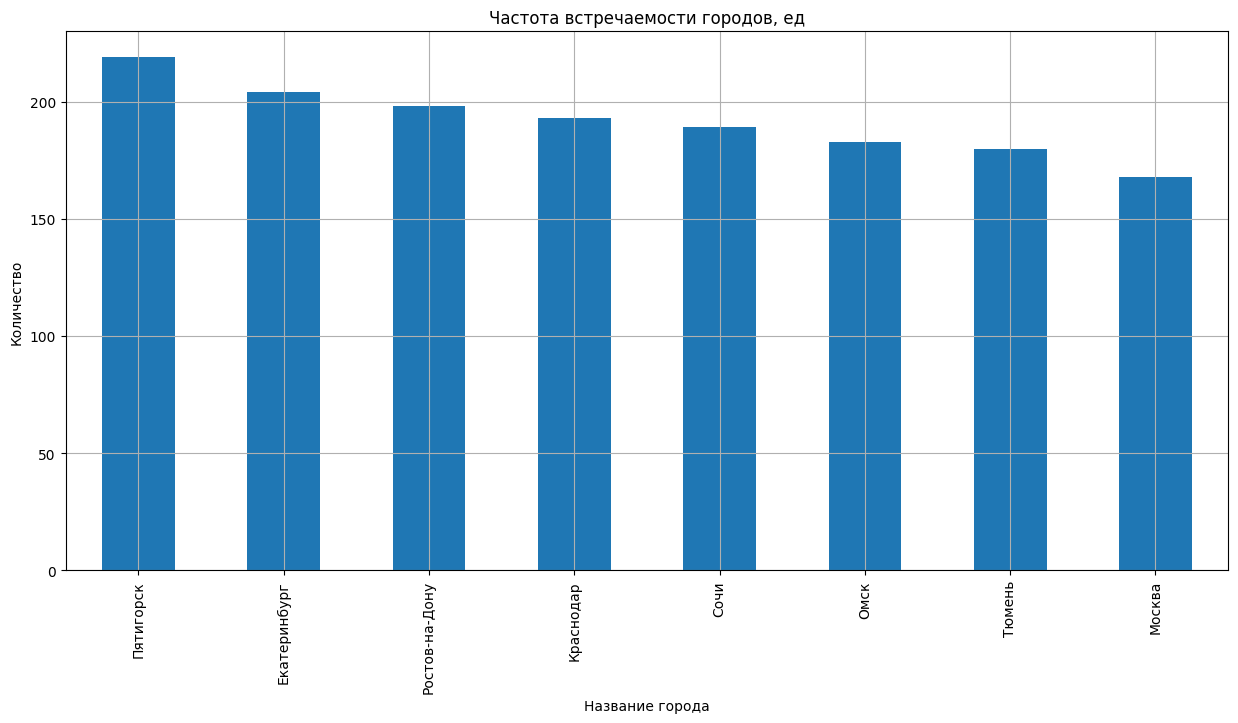

In [19]:
# визуализируем частоту встречаемости городов
# для начала создадим фрейм 'city_sum_procent' с количеством встречаемости городов
city_sum_procent = data_users.pivot_table(index='city', values='user_id', aggfunc='count')
city_sum_procent.columns = ['count']

# добавим столбец 'procent' с процентом встречаемости городов
city_sum_procent['procent'] = round(city_sum_procent['count'] / city_sum, 3) * 100

# построим столбчатую диаграмму количества
city_sum_procent['count'].sort_values(ascending=False).plot.bar(figsize=(15, 7))
plt.grid(True)
plt.xlabel('Название города')
plt.ylabel('Количество')
plt.title('Частота встречаемости городов, ед')

In [20]:
# выведем проценты соотношения для каждого города относительно общего количества пользователей
city_sum_procent.sort_values('procent', ascending=False)

,count,procent
city,,
Пятигорск,219,14.3
Екатеринбург,204,13.3
Ростов-на-Дону,198,12.9
Краснодар,193,12.6
Сочи,189,12.3
Омск,183,11.9
Тюмень,180,11.7
Москва,168,11.0


Text(0.5, 1.0, 'Частота встречаемости городов, %')

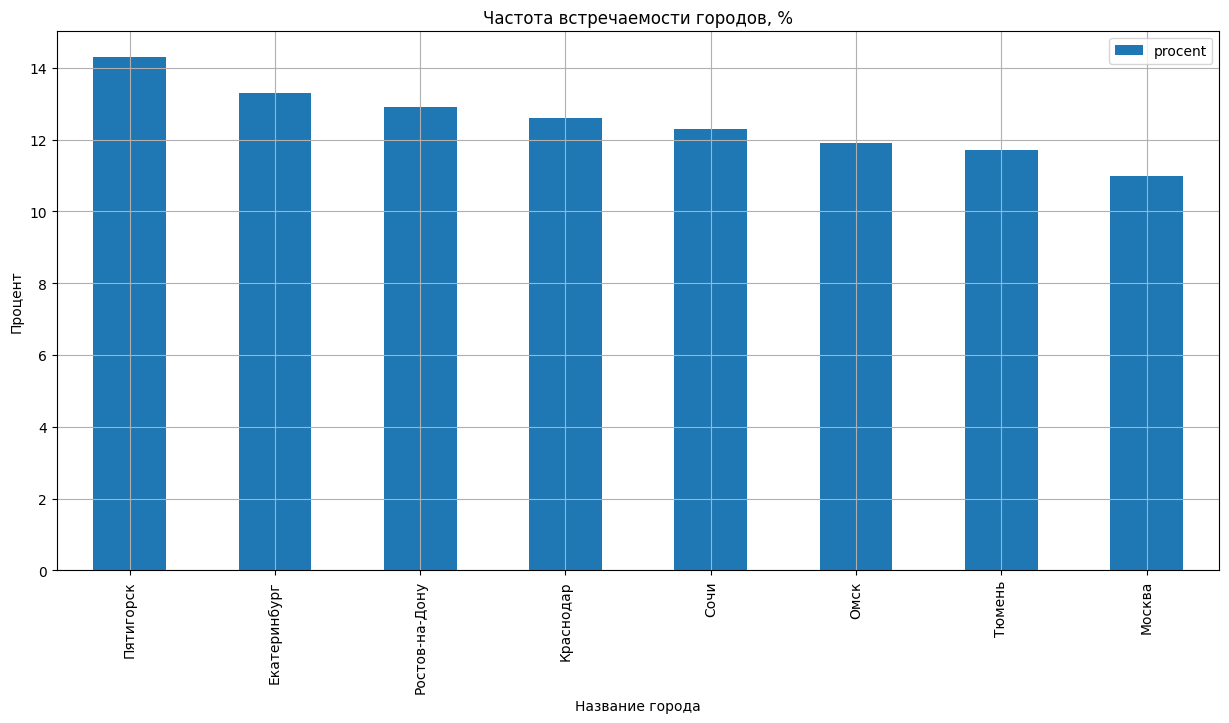

In [21]:
# построим столбчатую диаграмму по проценту встречаемости городов
city_sum_procent.loc[:, ['procent']].sort_values('procent', ascending=False).plot.bar(figsize=(15, 7))
plt.grid(True)
plt.xlabel('Название города')
plt.ylabel('Процент')
plt.title('Частота встречаемости городов, %')

##### Соотношение пользователей с подпиской и без подписки

Text(0.5, 1.0, 'Соотношение пользователей с подпиской и без подписки, ед')

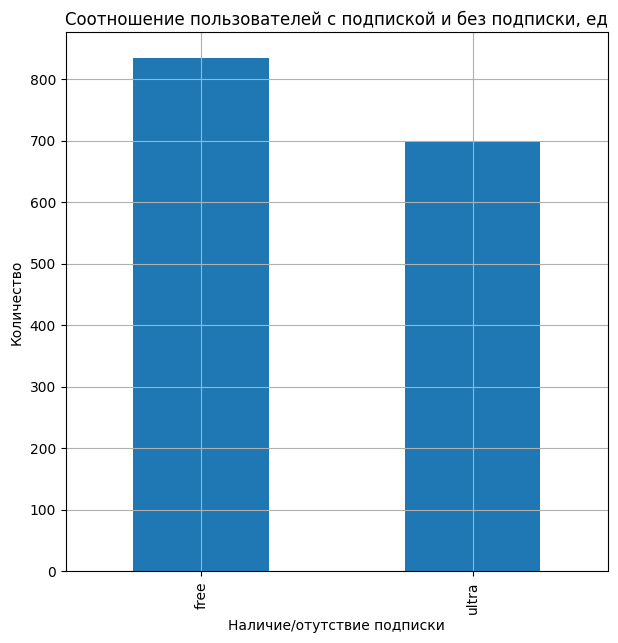

In [22]:
# визуализируем соотношение пользователей с подпиской и без подписки
# для начала создадим фрейм 'subscription_type_kol' с количеством пользователей с подпиской и без
subscription_type_kol = data_users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
subscription_type_kol.columns = ['count']

# добавим столбец 'procent' с процентным соотношением
subscription_type_kol['procent'] = round(subscription_type_kol['count'] / city_sum, 3) * 100

# построим столбчатую диаграмму количества
subscription_type_kol['count'].sort_values(ascending=False).plot.bar(figsize=(7, 7))
plt.grid(True)
plt.xlabel('Наличие/отутствие подписки')
plt.ylabel('Количество')
plt.title('Соотношение пользователей с подпиской и без подписки, ед')

Для наглядности построим и круговые диаграммы.

In [23]:
# выведем 'subscription_type_kol'
subscription_type_kol

,count,procent
subscription_type,,
free,835,54.4
ultra,699,45.6


Text(0.5, 1.0, 'Соотношение пользователей с подпиской и без подписки, %')

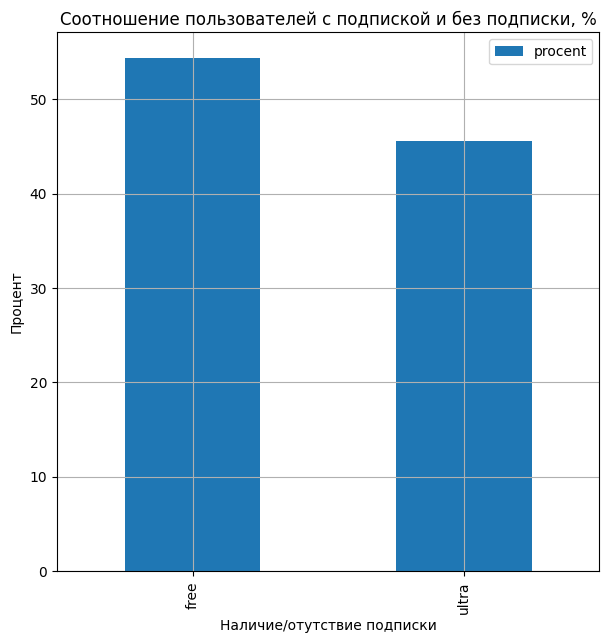

In [24]:
# построим столбчатую диаграмму визуализирующую соотношение пользователей с подпиской и без
subscription_type_kol.loc[:, ['procent']].sort_values('procent', ascending=False).plot.bar(figsize=(7, 7))
plt.grid(True)
plt.xlabel('Наличие/отутствие подписки')
plt.ylabel('Процент')
plt.title('Соотношение пользователей с подпиской и без подписки, %')

<Axes: ylabel='count'>

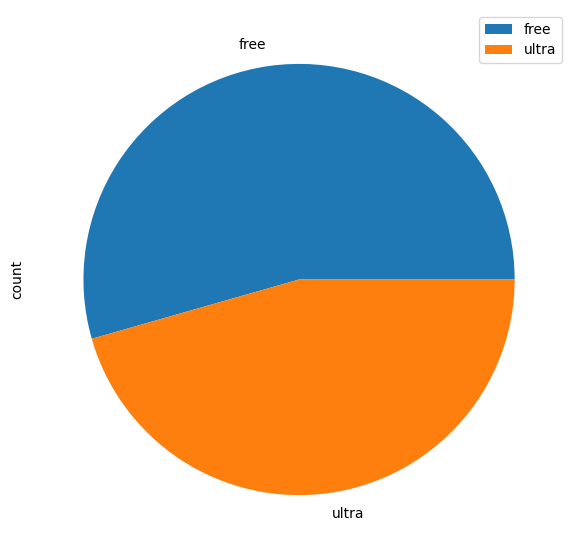

In [25]:
# построим круговую диаграмму для количества
subscription_type_kol['count'].plot(kind='pie', y='count', figsize=(7, 7), legend=True)

##### Возраст пользователей

Text(0.5, 1.0, 'Соотношение пользователей по возрастам, ед')

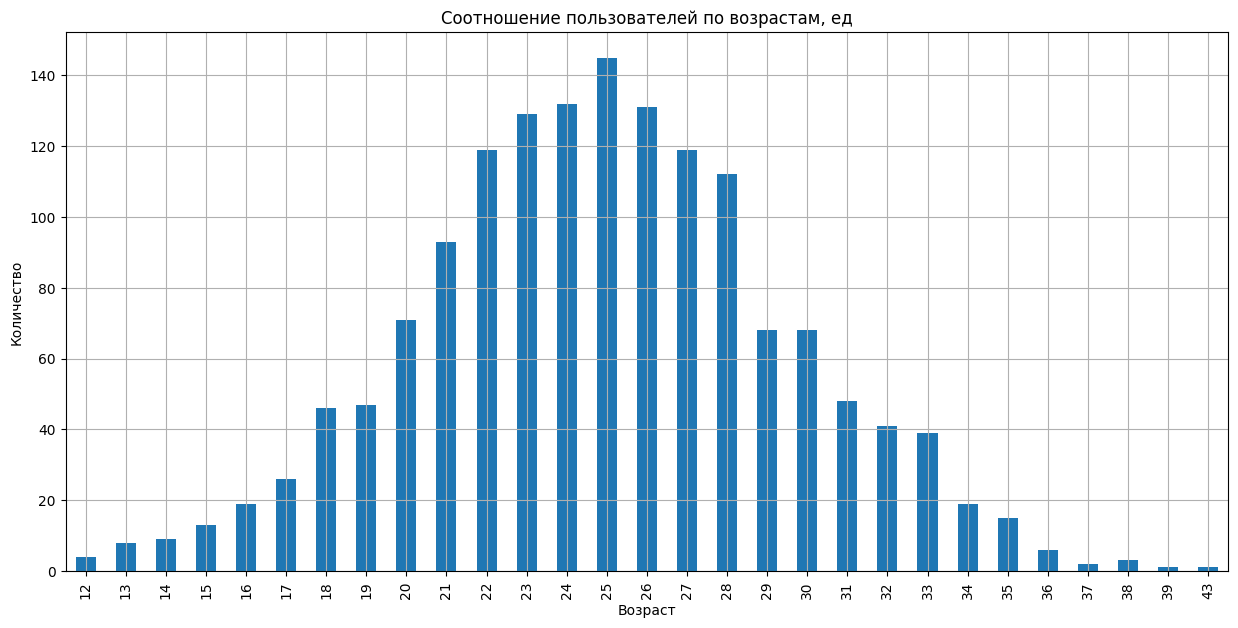

In [26]:
# визуализируем соотношение пользователей по возрастам
# для начала создадим фрейм 'age_kol' с количеством пользователей по возрастам
age_kol = data_users.pivot_table(index='age', values='user_id', aggfunc='count')
age_kol.columns = ['count']

# добавим столбец 'procent' с процентным соотношением
age_kol['procent'] = round(age_kol['count'] / city_sum, 3) * 100

# построим столбчатую диаграмму количества
age_kol['count'].plot.bar(figsize=(15, 7))
plt.grid(True)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Соотношение пользователей по возрастам, ед')

Text(0.5, 1.0, 'Соотношение пользователей по возрастам, %')

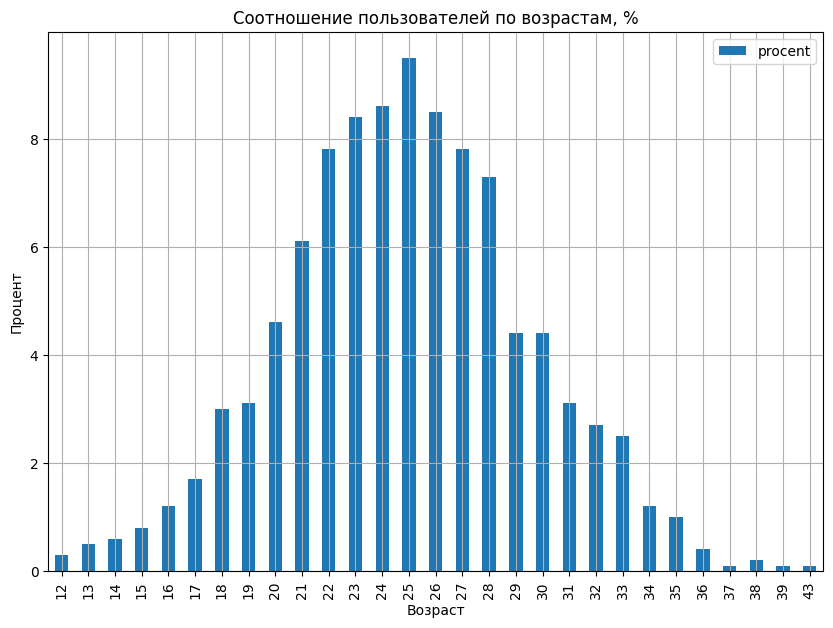

In [27]:
# построим столбчатую диаграмму визуализирующую соотношение пользователей с подпиской и без
age_kol.loc[:, ['procent']].plot.bar(figsize=(10, 7))
plt.grid(True)
plt.xlabel('Возраст')
plt.ylabel('Процент')
plt.title('Соотношение пользователей по возрастам, %')

In [28]:
# Выведем описательные статистики для столбца 'count'
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

##### Расстояние, которое пользователь преодолел за одну поездку

In [29]:
# выведем на экран данные о столбце расстоянии 'distance'
data_riders['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Text(0.5, 1.0, 'Гистограмма распределения расстояний, м')

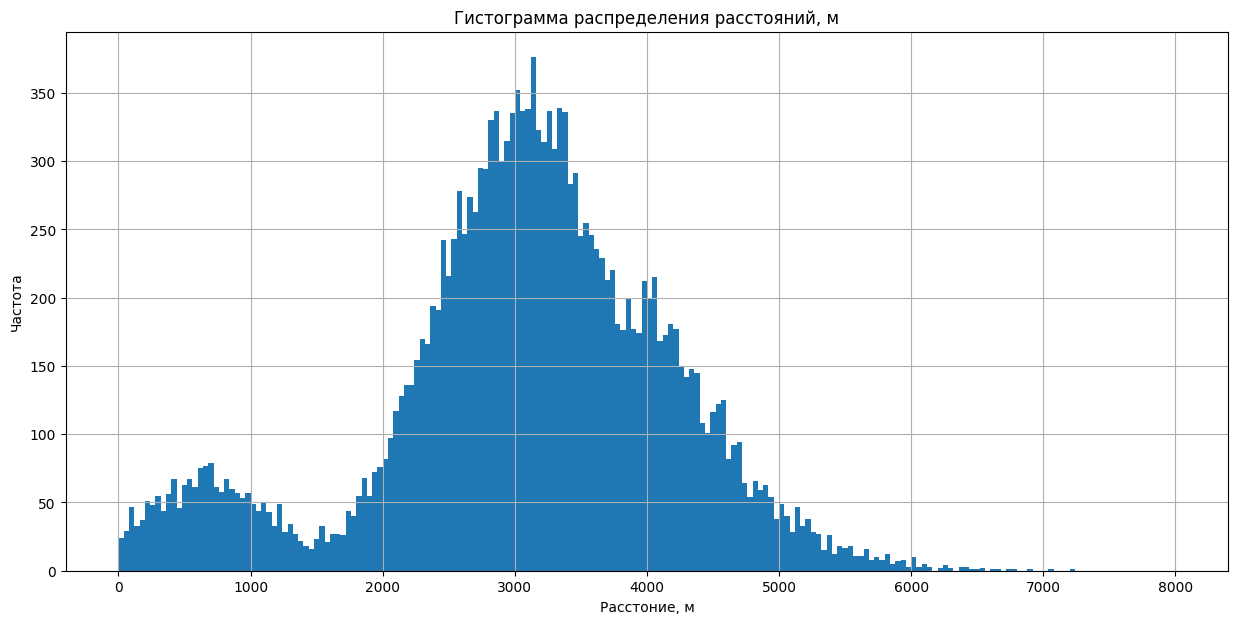

In [30]:
# визуализируем расстояний, которые преодолели пользователи за одну поездку
data_riders['distance'].plot(kind='hist', bins=200, range=(0, 8000), figsize=(15, 7), grid=True)
plt.xlabel('Расстоние, м')
plt.ylabel('Частота')
plt.title('Гистограмма распределения расстояний, м')

Text(0, 0.5, 'Расстояние, м.')

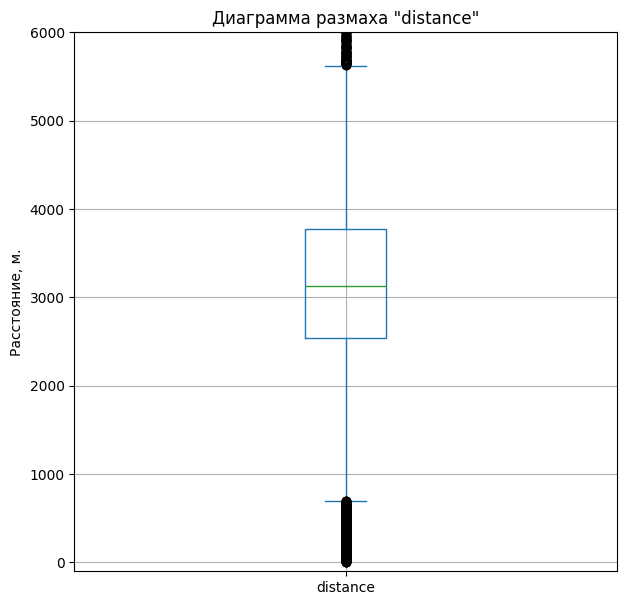

In [31]:
# построим диаграмму размаха для расстояний 'distance'
data_riders['distance'].plot(kind='box', ylim=(-100, 6000), figsize=(7, 7), grid=True)
plt.title('Диаграмма размаха "distance"')
plt.ylabel('Расстояние, м.')

##### Продолжительность поездок

In [32]:
# выведем на экран данные о столбце продолжительности поездки 'duration'
data_riders['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Text(0.5, 1.0, 'Гистограмма распределения продолжительности поездок, мин')

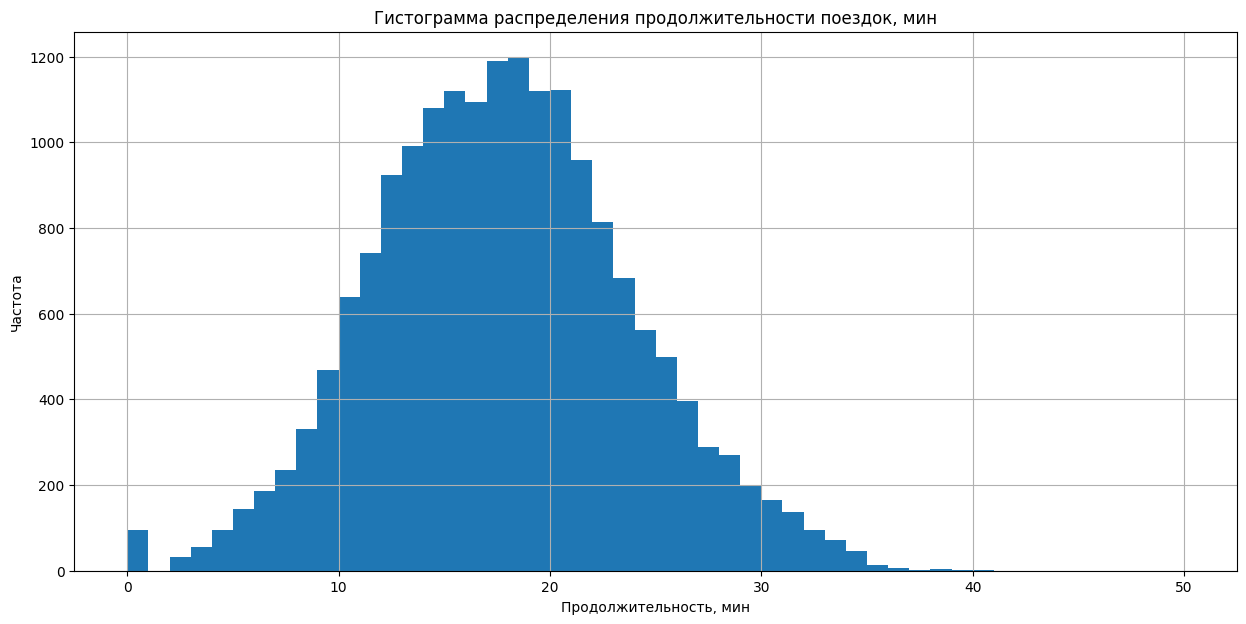

In [33]:
# визуализируем расстояний, которые преодолели пользователи за одну поездку
data_riders['duration'].plot(kind='hist', bins=50, range=(0, 50), figsize=(15, 7), grid=True)
plt.xlabel('Продолжительность, мин')
plt.ylabel('Частота')
plt.title('Гистограмма распределения продолжительности поездок, мин')

Text(0, 0.5, 'Продолжительность, мин')

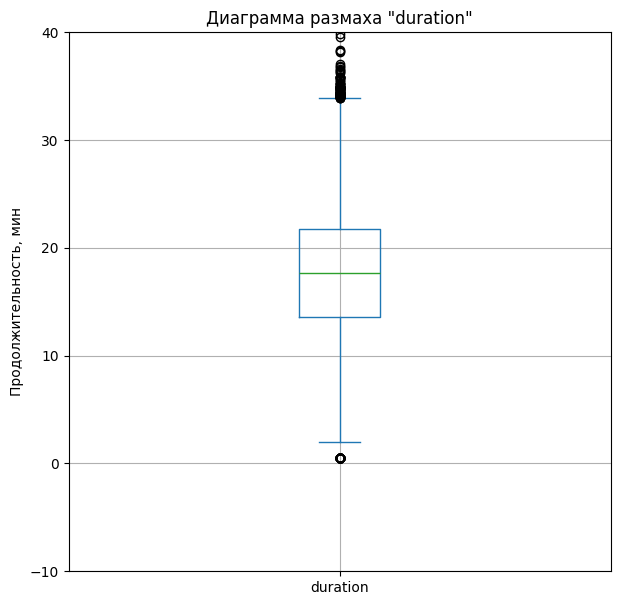

In [34]:
# построим диаграмму размаха для продолжительности поездки 'duration'
data_riders['duration'].plot(kind='box', ylim=(-10, 40), figsize=(7, 7), grid=True)
plt.title('Диаграмма размаха "duration"')
plt.ylabel('Продолжительность, мин')

**Вывод 3**

Итак, распределение по городам показало, что *наибольшее количество пользователей, перевалившее за 200 зарегистрировано в Пятигорске и Екатеринбурге (14.3% и 13.3% от общего числа соответственно).* *Наименьшим же количеством пользователей, а именно, 180 и менее, отличились, Тюмень и Москва (11.7% и 11% от общего числа соответственно).* **Сервис хорошо развит в городах, удаленных от Москвы.**

Исследование пользователей с подпиской и без подписки показало нам *соотношение 54.4% на 45.6% в пользу пользователей без подписки, их количество 835 пользователей, против 699 пользователей с подпиской.* **Пользователи чаще предпочитают не покупать подписку.**

Исследование распределения количества пользователей по возрастам показало *ожидаемое нормальное распределение с пиком в категории 25 лет.* Это подтвердила и описательная статистика, согласно которой медиана равна 25 годам, среднее 24.9 лет, а межквартильный размах простирается между 22 и 28 годами. Данная категория составляет почти 10% от общего количества, а **портрет представителя целевой аудитории рисуется с вилкой 20-30 лет.** Максимальный возраст составил 43 года, а минимальный 12 лет.

Касаемо расстояния, преодолеваемого пользователями можно сказать следующее: 
**Чаще всего пользователи проезжают чуть более 3000 метров. Об этом свидетельствует и гистограмма, и среднее и медиана.**
При этом имеется небольшой пик в районе 700 метров, которые переходит в низовой пик к 1500 метров и уходит в стремительный рост, вплоть до 3000 метров. Это означает, что пользователи либо берут самокат для совсем короткой поездки, не превышающей километра, либо уже едут на расстояние, приближающееся к 3000 метрам. Стоит отметить, что свыше 6000 метров поездок практически не совершается. Наиболее характерное расстоние от 2000 до максимум 5000 метров. На данном промежутке в подавляющем количестве случаев частота превышает отметку в 100.

**Наиболее характерной продолжительностью поездки является промежуток между 7 и 28 минутами. Распределение нормальное с пиком в 17 минутах (медиана, среднее и гистограмма свидетельствуют об этом).** Менее 7 и более 28 минут частота совсем мала и не превышает 200, тогда, как на пике она находится у отметки 1200. Более же 40 минут поездок нет, практически совсем, за одним исключением. Стоит отметить небольшой всплеск в 1 минуте, частота которой превышает 50 единиц, при этом 2 минута характеризуется 0 частотой. Данный момент можно объяснить случаями, когда пользователь забронировал самокат, но, по какой-то причине завершил аренду практически сразу. Причиной тому могут служить как поменявшиеся планы пользователя, так и неполадки в работе приложения, либо самоката.

<a class='anchor' id='4-bullet'></a>
## Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм

In [35]:
# объединим датафреймы 'data_users' и 'data_riders' и поместим в 'data'
data = data_users.merge(data_riders, on='user_id', how='left')
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            18068 non-null  int64  
 1   name               18068 non-null  object 
 2   age                18068 non-null  int64  
 3   city               18068 non-null  object 
 4   subscription_type  18068 non-null  object 
 5   distance           18068 non-null  float64
 6   duration           18068 non-null  float64
 7   date               18068 non-null  object 
 8   month              18068 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 1.2+ MB
None


,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01 00:00:00,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18 00:00:00,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20 00:00:00,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11 00:00:00,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28 00:00:00,8
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09 00:00:00,10
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19 00:00:00,10
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06 00:00:00,11
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14 00:00:00,11
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22 00:00:00,11


In [36]:
# объединим датафрейм 'data' и 'data_sub'
data = data.merge(data_sub, on='subscription_type')

# выведем первые 10 строк 'data' и размер для ознакомления
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            18068 non-null  int64  
 1   name               18068 non-null  object 
 2   age                18068 non-null  int64  
 3   city               18068 non-null  object 
 4   subscription_type  18068 non-null  object 
 5   distance           18068 non-null  float64
 6   duration           18068 non-null  float64
 7   date               18068 non-null  object 
 8   month              18068 non-null  int32  
 9   minute_price       18068 non-null  int64  
 10  start_ride_price   18068 non-null  int64  
 11  subscription_fee   18068 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 1.6+ MB
None


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01 00:00:00,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18 00:00:00,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20 00:00:00,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11 00:00:00,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28 00:00:00,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09 00:00:00,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19 00:00:00,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06 00:00:00,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14 00:00:00,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22 00:00:00,11,6,0,199


Датафреймы объединены корректно. Все столбцы на месте

##### Создадим два дополнительных датафрейма

In [37]:
# создадим датафрейм 'data_ultra' с данными о пользователях с подпиской
data_ultra = data.loc[data['subscription_type'] == 'ultra',:]
print(data_ultra.info())
data_ultra.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            6500 non-null   int64  
 1   name               6500 non-null   object 
 2   age                6500 non-null   int64  
 3   city               6500 non-null   object 
 4   subscription_type  6500 non-null   object 
 5   distance           6500 non-null   float64
 6   duration           6500 non-null   float64
 7   date               6500 non-null   object 
 8   month              6500 non-null   int32  
 9   minute_price       6500 non-null   int64  
 10  start_ride_price   6500 non-null   int64  
 11  subscription_fee   6500 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 634.8+ KB
None


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01 00:00:00,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18 00:00:00,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20 00:00:00,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11 00:00:00,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28 00:00:00,8,6,0,199


In [38]:
# создадим датафрейм 'data_free' с данными о пользователях без подписки
data_free = data.loc[data['subscription_type'] == 'free',:]
print(data_free.info())
data_free.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11568 non-null  int64  
 1   name               11568 non-null  object 
 2   age                11568 non-null  int64  
 3   city               11568 non-null  object 
 4   subscription_type  11568 non-null  object 
 5   distance           11568 non-null  float64
 6   duration           11568 non-null  float64
 7   date               11568 non-null  object 
 8   month              11568 non-null  int32  
 9   minute_price       11568 non-null  int64  
 10  start_ride_price   11568 non-null  int64  
 11  subscription_fee   11568 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 1.1+ MB
None


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02 00:00:00,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01 00:00:00,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04 00:00:00,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10 00:00:00,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14 00:00:00,2,8,50,0


Датафреймы созданы. Потери данных не наблюдается

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

###### Исследуем информацию о расстоянии в каждом из датафреймов

In [39]:
# выведем информацию о столбце 'distance' датафрейма 'data_ultra' 
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [40]:
# выведем информацию о столбце 'distance' датафрейма 'data_free' 
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Text(0.5, 1.0, 'Гистограмма распределения расстояния "distance" датафрейма "data_ultra", м')

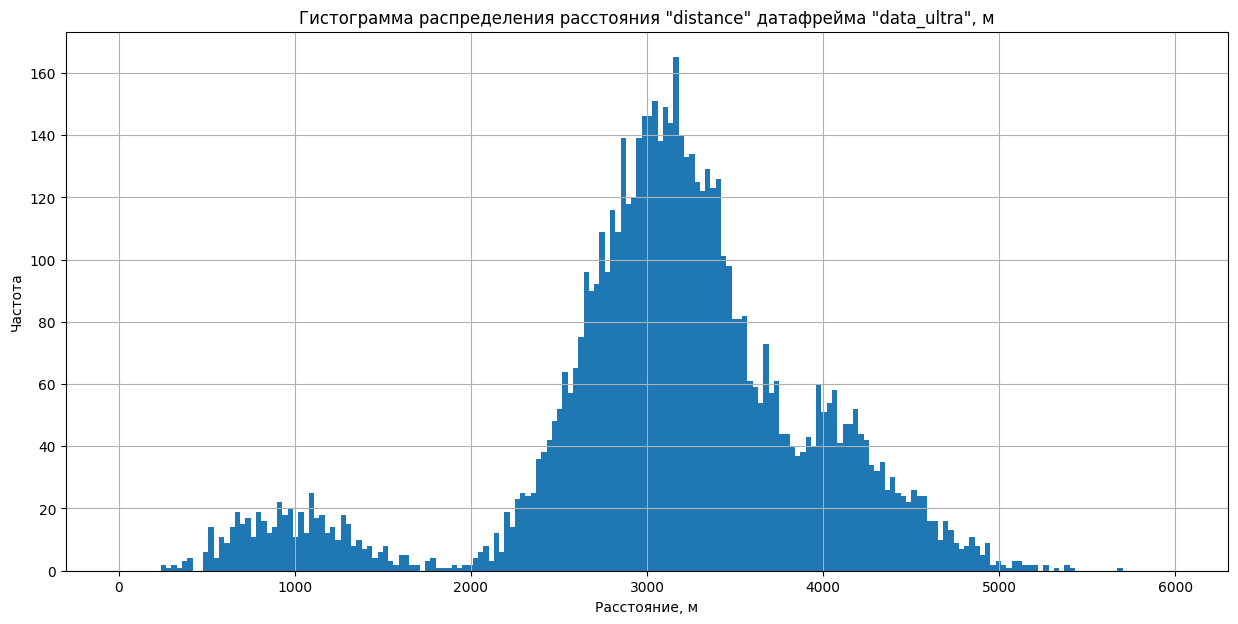

In [41]:
# построим гистограмму по столбцу 'distance' датафрейма 'data_ultra'
data_ultra['distance'].plot(kind='hist', bins=200, range=(0, 6000), figsize=(15, 7), grid=True)
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.title('Гистограмма распределения расстояния "distance" датафрейма "data_ultra", м')

Text(0.5, 1.0, 'Гистограмма распределения расстояний "distance" датафрейма "data_free", м')

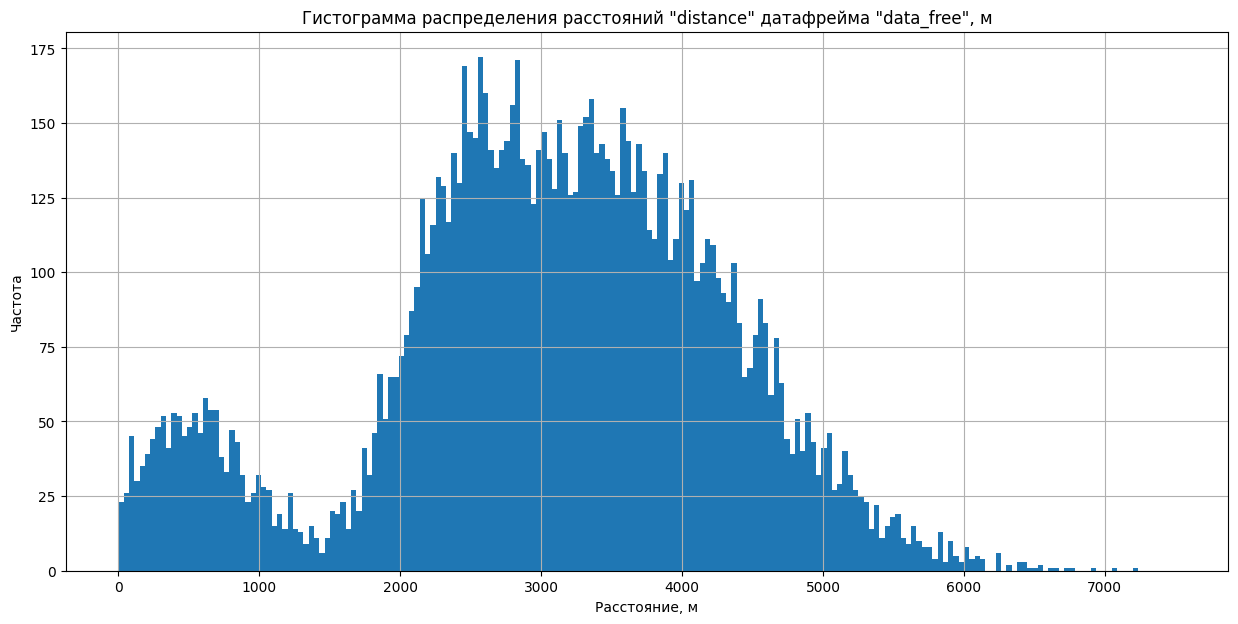

In [42]:
# построим гистограмму по столбцу 'distance' датафрейма 'data_free'
data_free['distance'].plot(kind='hist', bins=200, range=(0, 7500), figsize=(15, 7), grid=True)
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.title('Гистограмма распределения расстояний "distance" датафрейма "data_free", м')

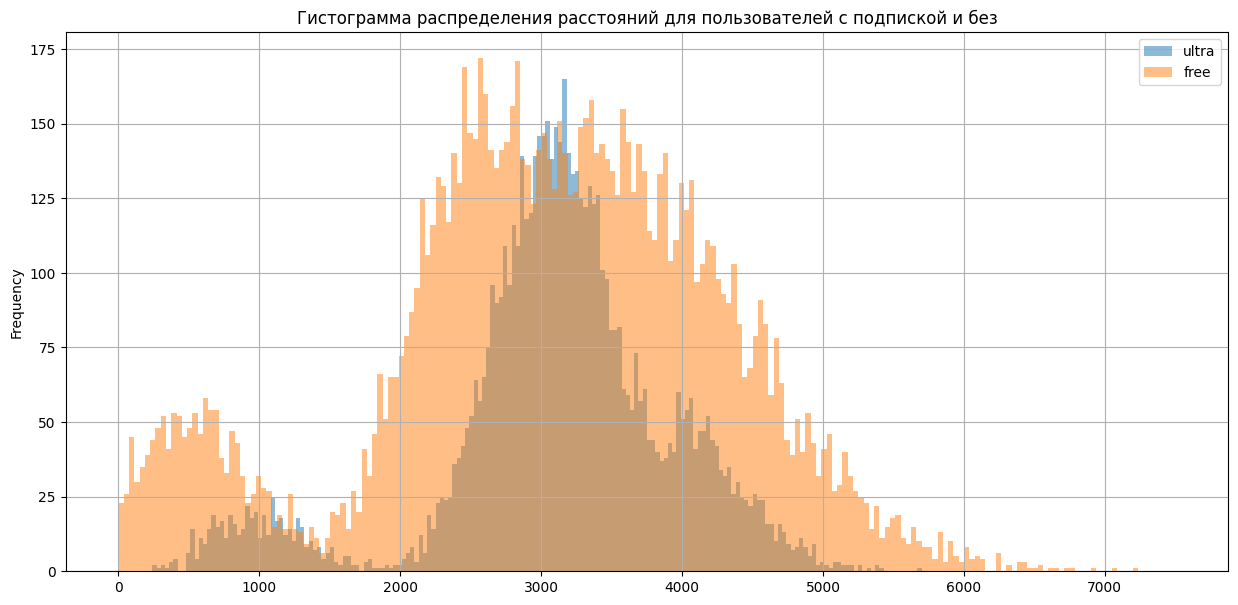

In [43]:
# построим гистограмму по столбцу 'distance' датафрейма 'data_ultra'
data_ultra['distance'].plot(kind='hist', bins=200, range=(0, 6000), figsize=(15, 7), grid=True, alpha=0.5, label='ultra')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')

# построим гистограмму по столбцу 'distance' датафрейма 'data_free'
data_free['distance'].plot(kind='hist', bins=200, range=(0, 7500), figsize=(15, 7), grid=True, alpha=0.5, label='free')


plt.legend(loc='upper right') 
plt.title('Гистограмма распределения расстояний для пользователей с подпиской и без') 
plt.show()

Text(0, 0.5, 'Расстояние, м')

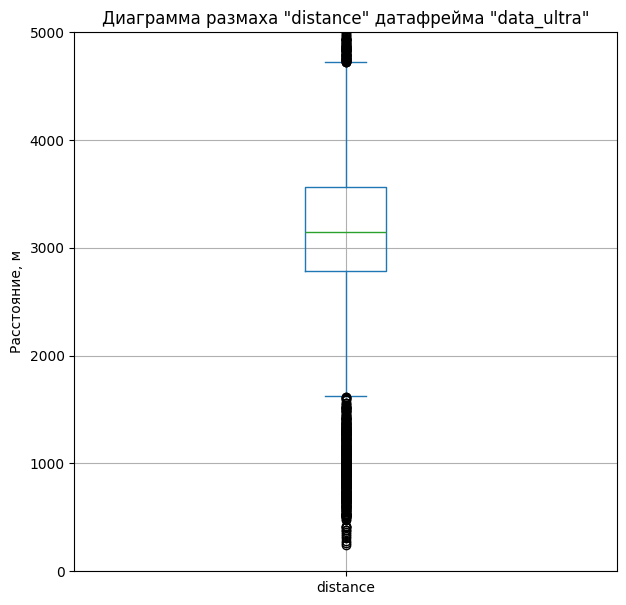

In [44]:
# построим диаграмму размаха для расстояния 'distance' датафрейма 'data_ultra'
data_ultra['distance'].plot(kind='box', ylim=(0, 5000), figsize=(7, 7), grid=True)
plt.title('Диаграмма размаха "distance" датафрейма "data_ultra"')
plt.ylabel('Расстояние, м')

Text(0, 0.5, 'Расстояние, м')

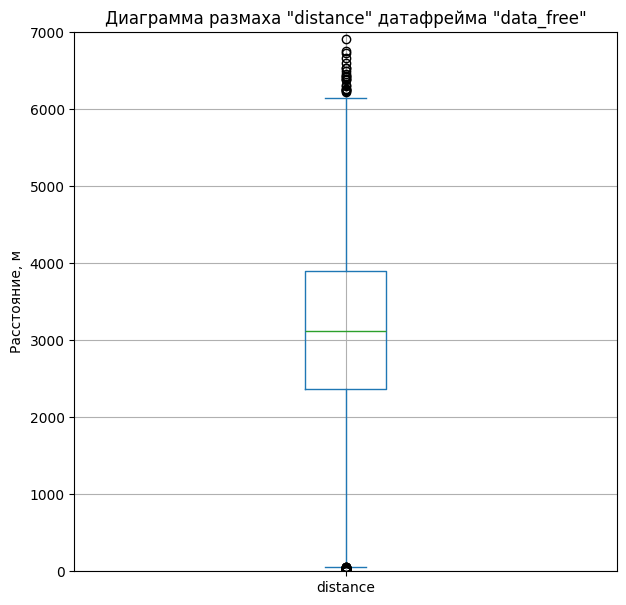

In [45]:
# построим диаграмму размаха для расстояния 'distance' датафрейма 'data_free'
data_free['distance'].plot(kind='box', ylim=(0, 7000), figsize=(7, 7), grid=True)
plt.title('Диаграмма размаха "distance" датафрейма "data_free"')
plt.ylabel('Расстояние, м')

###### Исследуем информацию о продолжительности в каждом из датафреймов

In [46]:
# выведем информацию о столбце 'duration' датафрейма 'data_ultra' 
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [47]:
# выведем информацию о столбце 'duration' датафрейма 'data_free' 
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Text(0.5, 1.0, 'Гистограмма распределения продолжительности "duration" датафрейма "data_ultra", мин')

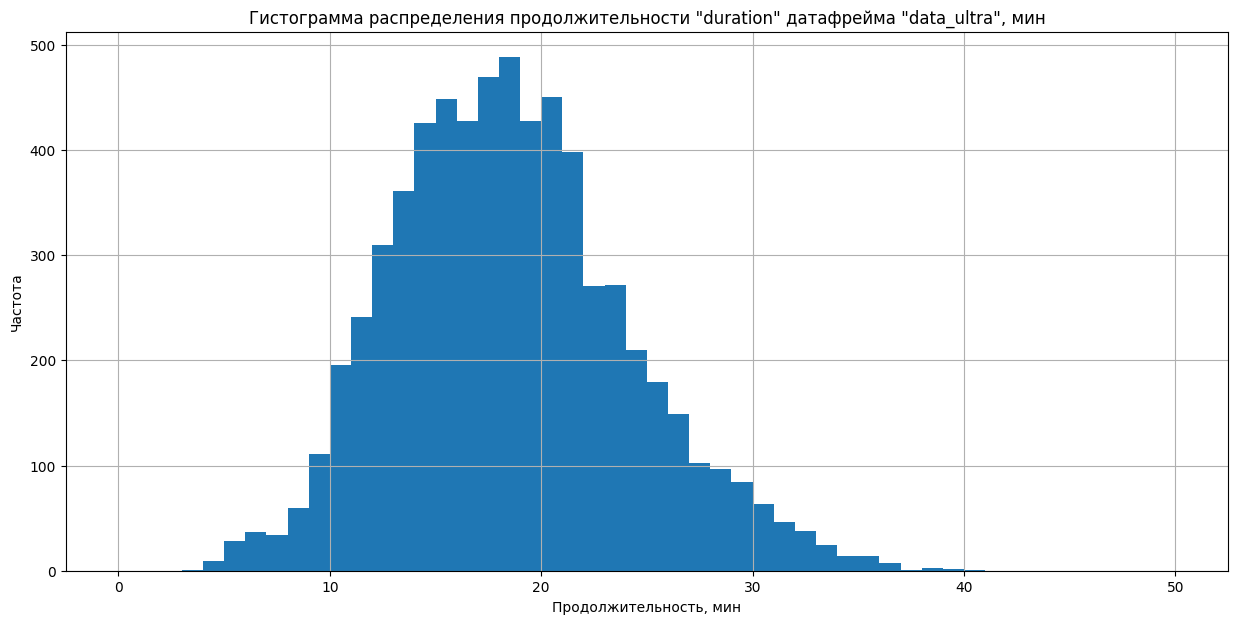

In [48]:
# построим гистограмму по столбцу 'duration' датафрейма 'data_ultra'
data_ultra['duration'].plot(kind='hist', bins=50, range=(0, 50), figsize=(15, 7), grid=True)
plt.xlabel('Продолжительность, мин')
plt.ylabel('Частота')
plt.title('Гистограмма распределения продолжительности "duration" датафрейма "data_ultra", мин')

Text(0.5, 1.0, 'Гистограмма распределения продолжительности "duration" датафрейма "data_free", мин')

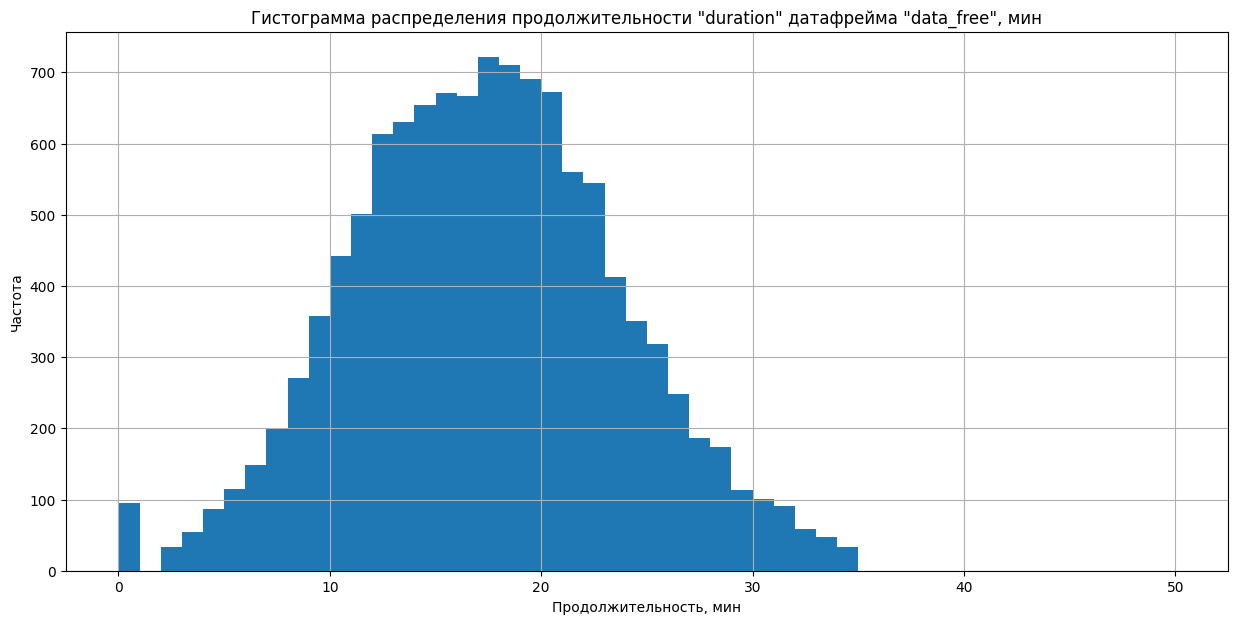

In [49]:
# построим гистограмму по столбцу 'duration' датафрейма 'data_free'
data_free['duration'].plot(kind='hist', bins=50, range=(0, 50), figsize=(15, 7), grid=True)
plt.xlabel('Продолжительность, мин')
plt.ylabel('Частота')
plt.title('Гистограмма распределения продолжительности "duration" датафрейма "data_free", мин')

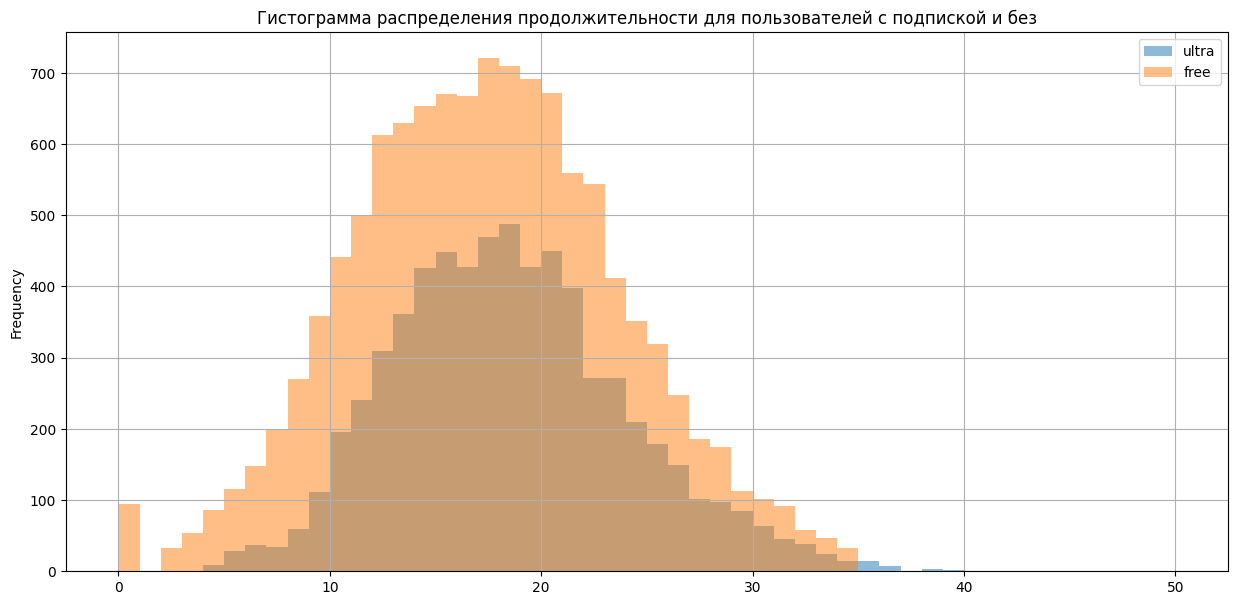

In [50]:
# построим гистограмму по столбцу 'duration' датафрейма 'data_ultra'
data_ultra['duration'].plot(kind='hist', bins=50, range=(0, 50), figsize=(15, 7), grid=True, label='ultra', alpha=0.5)
plt.xlabel('Продолжительность, мин')
plt.ylabel('Частота')

# построим гистограмму по столбцу 'duration' датафрейма 'data_free'
data_free['duration'].plot(kind='hist', bins=50, range=(0, 50), figsize=(15, 7), grid=True, label='free', alpha=0.5)

plt.legend(loc='upper right') 
plt.title('Гистограмма распределения продолжительности для пользователей с подпиской и без') 
plt.show()

Text(0, 0.5, 'Продолжительность, мин')

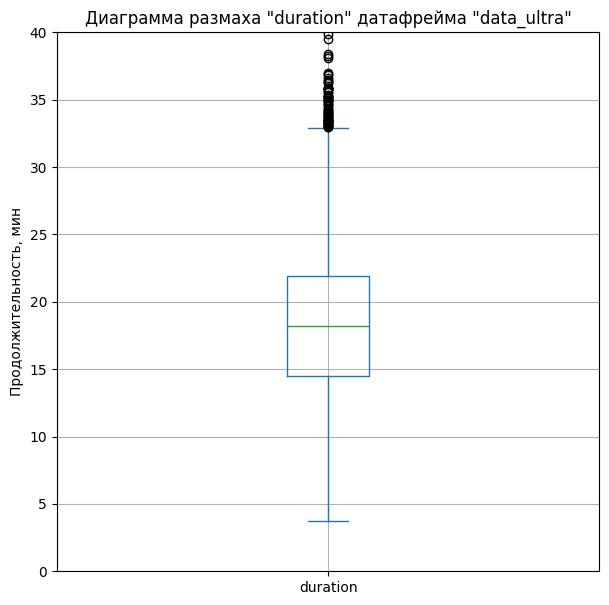

In [51]:
# построим диаграмму размаха для продолжительности 'duration' датафрейма 'data_ultra'
data_ultra['duration'].plot(kind='box', ylim=(0, 40), figsize=(7, 7), grid=True)
plt.title('Диаграмма размаха "duration" датафрейма "data_ultra"')
plt.ylabel('Продолжительность, мин')

Text(0, 0.5, 'Продолжительность, мин')

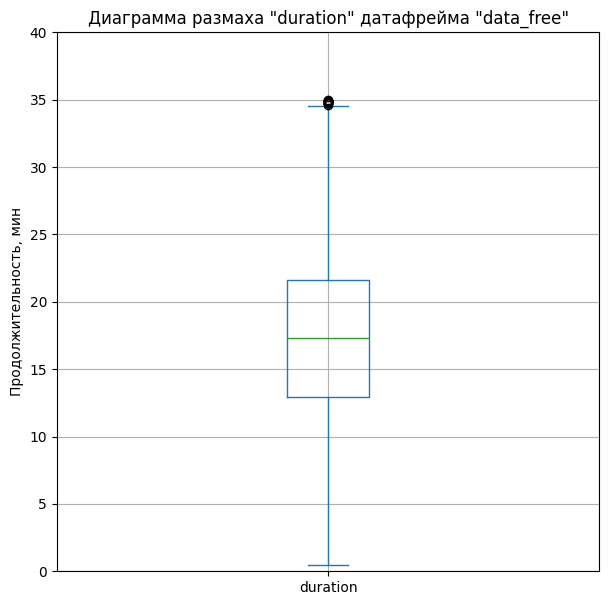

In [52]:
# построим диаграмму размаха для продолжительности 'duration' датафрейма 'data_free'
data_free['duration'].plot(kind='box', ylim=(0, 40), figsize=(7, 7), grid=True)
plt.title('Диаграмма размаха "duration" датафрейма "data_free"')
plt.ylabel('Продолжительность, мин')

**Вывод 4**

Исследование расстояния показало, что *пользователи с подпиской в среднем проезжают чуть большее расстояние, о чем свидетельствуют и средние, и медиана. Однако, разница совсем незначительна (среднее расстояние с подпиской 3115 метров, против 3045 метров без подписки).* Более интересную картину явили гистограммы и диаграммы размаха. По ним отчетливо видно разницу в дисперсиях, у *пользователей без подписки она значительно больше. Данный факт подтверждает и среднее отклонение, у пользователей без подписки оно равно 1246, против 836 у пользователей с подпиской.* Также, стоит отметить, что пользователи без подписки чаще берут самокат для поездки на расстояние до 1000 метров, об этом говорит первый малый пик. 
**Итак, основное отличие данных о расстояниях, преодоленных пользователями с подпиской и без нее, заключается в большой разнице дисперсий, при, практически равных средних и медианах. Данное различие можно объяснить тем, что пользователи с подпиской являются постоянными пользователями, а их маршруты уже намечены. Вот они их и накатывают. А вот без подписки людей больше и берут они самокат зачастую просто прокатиться.**

*Однако, стоит отметить, что брать подписку особо выгодно для поездок на небольшие расстояния. Так, 5-ти минутная поездка пользователю с подпиской может обойтись в 30 рублей, против 90 рублей (не считая оплаты самой подписки). Выглядит очень даже привлекательно. А вот на графиках большого количества поездок на малое расстояние пользователей с подпиской не наблюдается. Возможно, стоит поработать над более доходчивым донесением привлекательности покупки подписки до пользователей.*

Исследование продолжительности поездок *ожидаемо показало для пользователей с подпиской большую среднюю продолжительность (18.5 минут против 17.3 минут) и меньшее стандартное отклонение (5.57 против 6.32).* Отличия ровно в тех же характеристиках, что и в случае с расстоянием, поэтому, объяснение то же самое. Стоит отметить всплеск случаев с нулевой продолжительностью поездки для пользователей без подписки (для пользователей с подпиской подобной особенности нет). *Скорее всего, причина в изменившихся планах, либо неполадках в работе приложения, либо, сложности разобраться в его работе.* Как мы уже говорили, пользователи без подписки зачастую не являются постоянными клиентами, а значит и неуверенных пользователей среди них больше.

<a class='anchor' id='5-bullet'></a>
## Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках "data_trip"

In [53]:
# для начала округлим данные о продолжительности каждой поездки
data['duration'] = np.ceil(data['duration'])

# создадим датафрейма 'data_trip'
data_trip = data.groupby(['user_id', 'month']).agg({'distance':'sum', 'duration':['sum', 'count'],
                                  'subscription_type':'first',
                                  'minute_price':'first',
                                  'start_ride_price':'first',
                                  'subscription_fee':'first'})
# выведем получившийся датафрейм для ознакомления
data_trip

distance duration       subscription_type minute_price  \
                        sum      sum count             first        first   
user_id month                                                               
1       1       7027.511294     42.0     2             ultra            6   
        4        754.159807      7.0     1             ultra            6   
        8       6723.470560     46.0     2             ultra            6   
        10      5809.911100     32.0     2             ultra            6   
        11      7003.499363     56.0     3             ultra            6   
...                     ...      ...   ...               ...          ...   
1534    6       3409.468534     26.0     2              free            8   
        8       7622.453034     48.0     2              free            8   
        9       4928.173852     23.0     1              free            8   
        11     13350.015305     78.0     4              free            8   
        12      2371.711192     16.0     1              free            8   

              start_ride_price subscription_fee  
                         first            first  
user_id month                                    
1       1                    0              199  
        4                    0              199  
        8                    0              199  
        10                   0              199  
        11                   0              199  
...                        ...              ...  
1534    6                   50                0  
        8                   50                0  
        9                   50                0  
        11                  50                0  
        12                  50                0  

[11331 rows x 7 columns]

In [54]:
# переименуем столбцы
data_trip.columns = ['distance', 'duration', 'count', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']

Датафрейм создан удачно.

##### В датафрейм "data_trip" добавим столбец 'month_rev' с помесячной выручкой от каждого пользователя

In [55]:
# округлим столбец 'duration' до целого вверх
# data_trip['duration'] = np.ceil(data_trip['duration'])

In [56]:
# добавим столбец с выручкой для каждого пользователя
data_trip['month_rev'] = data_trip['subscription_fee'] + data_trip['start_ride_price'] * data_trip['count'] + data_trip['minute_price'] * data_trip['duration']

# выведем датафрем на экран для ознакомления
data_trip

distance  duration  count subscription_type  minute_price  \
user_id month                                                                  
1       1       7027.511294      42.0      2             ultra             6   
        4        754.159807       7.0      1             ultra             6   
        8       6723.470560      46.0      2             ultra             6   
        10      5809.911100      32.0      2             ultra             6   
        11      7003.499363      56.0      3             ultra             6   
...                     ...       ...    ...               ...           ...   
1534    6       3409.468534      26.0      2              free             8   
        8       7622.453034      48.0      2              free             8   
        9       4928.173852      23.0      1              free             8   
        11     13350.015305      78.0      4              free             8   
        12      2371.711192      16.0      1              free             8   

               start_ride_price  subscription_fee  month_rev  
user_id month                                                 
1       1                     0               199      451.0  
        4                     0               199      241.0  
        8                     0               199      475.0  
        10                    0               199      391.0  
        11                    0               199      535.0  
...                         ...               ...        ...  
1534    6                    50                 0      308.0  
        8                    50                 0      484.0  
        9                    50                 0      234.0  
        11                   50                 0      824.0  
        12                   50                 0      178.0  

[11331 rows x 8 columns]

**Вывод 5** 

На данном этапе мы создали отдельный датафрейм *'data_trip'* с агрегированными данными, *содержащими информацию о помесячной выручке, которую принес каждый пользователь.*

<a class='anchor' id='6-bullet'></a>
## Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

**Гипотеза гласит - средняя продолжительность поездки подписчиков больше, чем у пользователей без подписки.**
Значит, будем проверять правостороннюю гипотезу по двум независимым датафреймам. В параметр *"equal_var"* передадим значение "False" так как стандартные отклонения, а значит и дисперсии у генеральных совокупностей разные (5.57 и 6.32), да и размеры генеральных совокупностей различны (6500 против 11568). 

Сформулируем нулевую и альтернативную гипотезы:

**H0 - Средняя продолжительность поездки подписчиков = Средняя продолжительность поездки пользователей без подписки.**

**H1 - Средняя продолжительность поездки подписчиков > Средняя продолжительность поездки пользователей без подписки.**

Размеры не особо большие, поэтому проведем проверку гипотез по генеральным совокупностям.

In [57]:
# создадим Serias "d_ultra" с продолжительностью поездок подписчиков
duration_ultra = data_ultra['duration']
# создадим Serias "d_free" с продолжительностью поездок пользователей без подписки
duration_free = data_free['duration']

# выведем среднее значение 'd_ultra'
print('Средняя продолжительность поездок подписчиков', duration_ultra.mean())
# выведем среднее значение 'd_free'
print('Средняя продолжительность поездок пользователей без подписки', duration_free.mean())

# зададим уровень статистической значимости
alpha = 0.05

# проведем стат. тест о равенстве продолжительности поездок
results = st.ttest_ind(duration_ultra, duration_free, equal_var=False, alternative='greater')

# выведем значение p-value
print(results.pvalue)

# сравним p-значение с заданным уровнем значимости alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Подписчики действительно тратят больше времени на поездки.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Среднее время поездок подписчиков и пользователей без подписки равно.')

Средняя продолжительность поездок подписчиков 18.54198516280583
Средняя продолжительность поездок пользователей без подписки 17.39090929866399
5.6757813771289775e-37
Отвергаем нулевую гипотезу. Подписчики действительно тратят больше времени на поездки.


**Нулевая гипотеза отвергнута. Значит, пользователи с подпиской действительно тратят больше времени на поездки.**

##### Оптимально ли среднее расстояние, которое проезжают пользователи с подпиской (с точки зрения износа)?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

*Сформулируем нулевую и альтернативную гипотезы:*

**H0 - Средне расстояние поездки подписчиков = 3130 метров.**

**H1 - Среднее расстояние поездки подписчиков > 3130 метров.**

Проверим правостороннюю гипотезу - **среднее расстояние, которое проезжают подписчики более 3130 метров**.

In [58]:
# создадим Serias "distance_ultra" с данными о расстоянии, пройденном подписчиками
distance_ultra = data_ultra['distance'] 

popmean = 3130 # столько времени должны в среднем проезжать подписчики

# выведем среднее значение "distance_ultra"
print(distance_ultra.mean())

# зададим уровень статистической значимости
alpha = 0.01

# проведем стат. тест о равенстве продолжительности поездок
results_1 = st.ttest_1samp(distance_ultra, popmean, alternative='greater')

# выведем значение p-value
print('p-значение:', results_1.pvalue)

# сравним p-значение с заданным уровнем значимости alpha
if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Подписчики действительно в среднем проезжают более оптимального расстояния.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Подписчики проезжают расстояние не превышающее оптимальное значения.')

3115.4453880370247
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу. Подписчики проезжают расстояние не превышающее оптимальное значения.


**Нулевую гипотезу отвергнуть не удалось. Подписчики действительно в среднем проезжают расстояние, не превышающее отметку в 3130 метров, являющуюся границей оптимального расстояния, с точки зрения износа самокатов.**

##### Приносят ли пользователи больше выручки помесячно, чем пользователи без подписки?

**Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.** 

*Сформулируем нулевую и альтернативную гипотезы:*

**H0 - Средняя помесячная выручка подписчиков = Средняя помесячная выручка пользователей без подписки.**

**H1 - Средняя помесячная выручка подписчиков > Средняя помесячная выручка пользователей без подписки.**

Проверим правостороннюю гипотезу.

In [59]:
# создадим Serias "data_trip_ultra" с данными о помесячной выручке для подписчиков
data_trip_ultra = data_trip.loc[data_trip['subscription_type'] == 'ultra', 'month_rev']
print(data_trip_ultra.describe())

# создадим Serias "data_trip_free" с данными о помесячной выручке для пользователей без подписки
data_trip_free = data_trip.loc[data_trip['subscription_type'] == 'free', 'month_rev']
print(data_trip_free.describe())

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: month_rev, dtype: float64
count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: month_rev, dtype: float64


Описание данных двух Serias показало большую разницу между стандартным отклонением (86 и 180 соответственно) и количеством данных (4533 против 6798) о выручке подписчиков и пользователями без подписки.

In [60]:
# выведем среднее значение 'data_trip_ultra'
print('Средняя помесячная выручка подписчиков', data_trip_ultra.mean())
# выведем среднее значение 'data_trip_free'
print('Средняя помесячная выручка пользователей без подписки', data_trip_free.mean())

# зададим уровень статистической значимости
alpha = 0.01

# проведем стат. тест о превышении среднего значения помесячной выручки подписчиков
results = st.ttest_ind(data_trip_ultra, data_trip_free, equal_var=False, alternative='greater')

# выведем значение p-value
print(results.pvalue)

# сравним p-значение с заданным уровнем значимости alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Подписчики действительно приносят больше помесячной выручки.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Подписчики не приносят помесячной выручки больше пользователей без подписки.')

Средняя помесячная выручка подписчиков 362.7921906022502
Средняя помесячная выручка пользователей без подписки 328.6413651073845
8.874140893976874e-40
Отвергаем нулевую гипотезу. Подписчики действительно приносят больше помесячной выручки.


**Нулевая гипотеза отвергнута, а это значит, что подписчики действительно в среднем приносят больше выручки в месяц, чем пользователи без подписки.**

##### Какой тест вам понадобился бы для проверки этой гипотезы?

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ**

Для проверки данной гипотезы следует воспользоваться методом **scipy.stats.ttest_rel()**, который используется для проверки гипотез о *РАВЕНСТВЕ СРЕДНИХ ДЛЯ ЗАВИСИМЫХ (ПАРНЫХ) ВЫБОРОК*. Проверка будет левосторонней.

Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем примере это пара измерений для каждого пользователя — до и после обновления сервера, с которым взаиможействует мобильное приложение.


Методу *scipy.stats.ttest_rel()* достаточно передать всего три параметра: наборы данных до и после, а также задать параметру *"alternative"* значение *"less"* (*alternative="less"). Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.

Подразумевается, что порядок объектов, для которых сделаны измерения, в обоих массивах тоже одинаковый: k-е по порядку число в первом наборе и k-е число во втором наборе — это измерения для одного и того же объекта до и после изменения.

*Гипотеза звучала бы так:*

**H0 - Количество обращений ДО = Количество обращений ПОСЛЕ**

**H1 - Количество обращей ДО < Количество обращений ПОСЛЕ**

Если нулевая гипотеза будет отвергнута, значит количество обращений действительно снизилось.

**Вывод 6**

В данном разделе были проверены 3 гипотезы:

- *Средняя продолжительность поездки подписчиков больше, чем у пользователей без подписки* - **Нулевая гипотеза ОТВЕРГНУТА. Подписчики действительно тратят больше времени на поездки.**
- *Подписчики в среднем проезжают больше расстояния, называемого оптимальным с точки зрения износа самокатов и равное 3130 метров* - **Нулевая гипотеза НЕ ОТВЕРГНУТА. Подписчики действительно проезжают менее 3130 метров.**
- *Средняя выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки* - **Нулевая гипотеза ОТВЕРГНУТА. Подписчики действительно приносят больше помесячной выручки.**

А также, был описан тест, необходимый для проверки гипотезы о снижении среднего значения генеральной совокупности после проведения некоторых обновлений, а именно, описан метод проверки гипотезы для зависимых (парных) датафреймов.

<a class='anchor' id='7-bullet'></a>
## Распределения

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Распределение получается биномиальным. Легко предположить, что для достижения среднего количества новых подписчиков необходимо разослать 1000 промокодов. Будем отталкиваться от данного значения "n". Получается, у нас большое значение "n" и малое "p". В таком случае можем приравнять данное распределение к Пуассоновскому найти лямбду. Для начала проверим насколько точно будем работать аппроксимация.

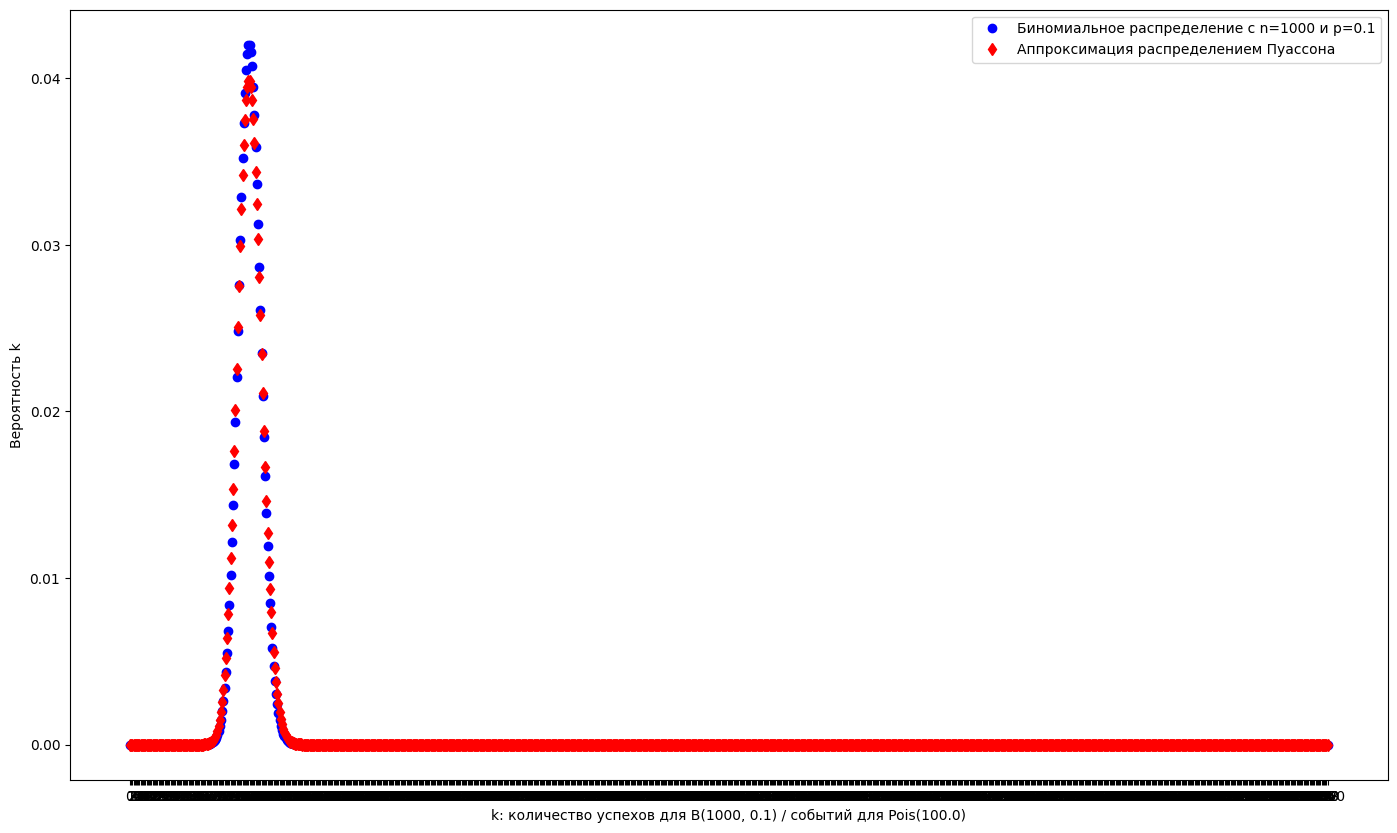

Средняя разница вероятностей на значение: 5.0964710685675655e-05
Максимальная разница вероятностей: 0.002155794051937235


In [61]:
# задаем параметры биномиального распределения
n = 1000
p = 0.1
 
# считаем параметр распределения Пуассона для аппроксимации
lmbd = n * p
 
# задаем диапазон значений k для построения графика
max_value = 1000
 
binom_probs = []
poisson_probs = []
# для всех значений от 0 до 1000
for k in range(max_value + 1):
    # рассчитываем значения вероятности для биномиального распределения
    # и распределения Пуассона
    binom_prob = binom.pmf(k, n, p)
    poisson_prob = poisson.pmf(k, lmbd)
    # добавляем в соответствующие списки
    binom_probs.append(binom_prob)
    poisson_probs.append(poisson_prob)
 
# рисуем графики
plt.figure(figsize=(17, 10))
plt.plot(range(max_value + 1), binom_probs, 'bo',
         label=f'Биномиальное распределение с n={n} и p={p}')
plt.plot(range(max_value + 1), poisson_probs, 'rd',
         label='Аппроксимация распределением Пуассона')
plt.xlabel(f'k: количество успехов для B{n, p} / событий для Pois({lmbd})')
plt.ylabel('Вероятность k')
plt.legend()
plt.xticks(range(max_value + 1))
plt.show()
 
# найдем суммарную ошибку аппроксимации для соответствующих значений:
error_values = []
for i in range(max_value + 1):
    error = abs(binom_probs[i] - poisson_probs[i])
    error_values.append(error)
 
print('Средняя разница вероятностей на значение:', sum(error_values) / len(error_values))
print('Максимальная разница вероятностей:', max(error_values))

*Точность аппроксимации достаточна!*

Text(0, 0.5, 'Вероятность')

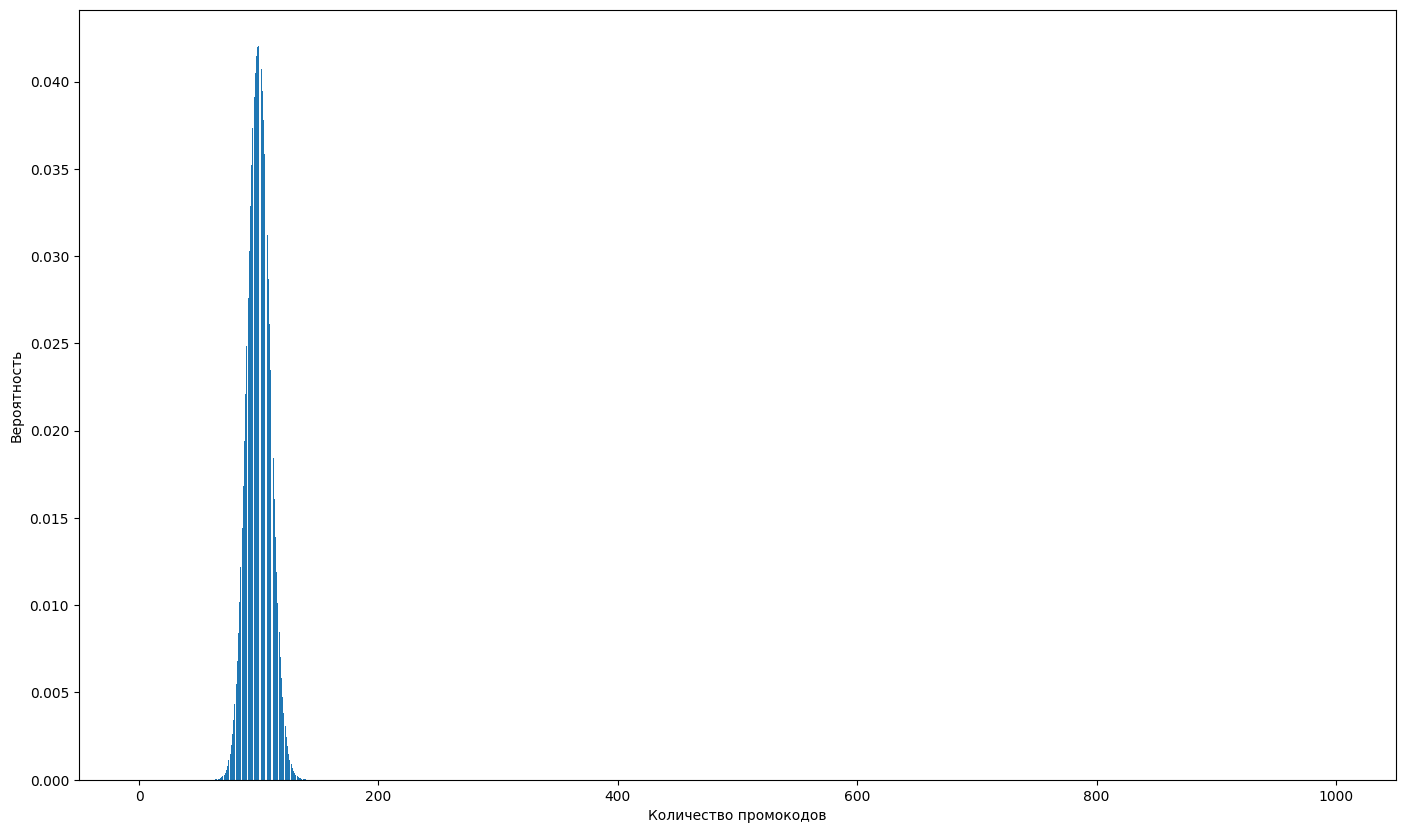

In [62]:
# количество попыток (количество промокодов)
n = 1000 
# необходимое количество подписок
x = 100
# вероятность успеха
p = 0.1
# параметр лямбда:
lmbd = n*p

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.figure(figsize=(17, 10))
plt.bar(range(0, n + 1), distr)
plt.xlabel('Количество промокодов')
plt.ylabel('Вероятность')

In [63]:
# выведем аккумулированную вероятность числа недобора количества подписок
poisson.cdf(x-1, n*p)

0.48670120172085135

На графике биномиального распределения видно, что вилка возможных новых подписок находится примерно между 50 и 150. При этом вероятность недобрать необходимое количество подписок, равное 100, равняется 48 %.

Предположим, что необходимое количество промокодов для достижения 5%-процентной вероятности недобрать необходимых новых подписок, равное 100 подпискам, находится между 1000 и 1200 единицами промокодов.

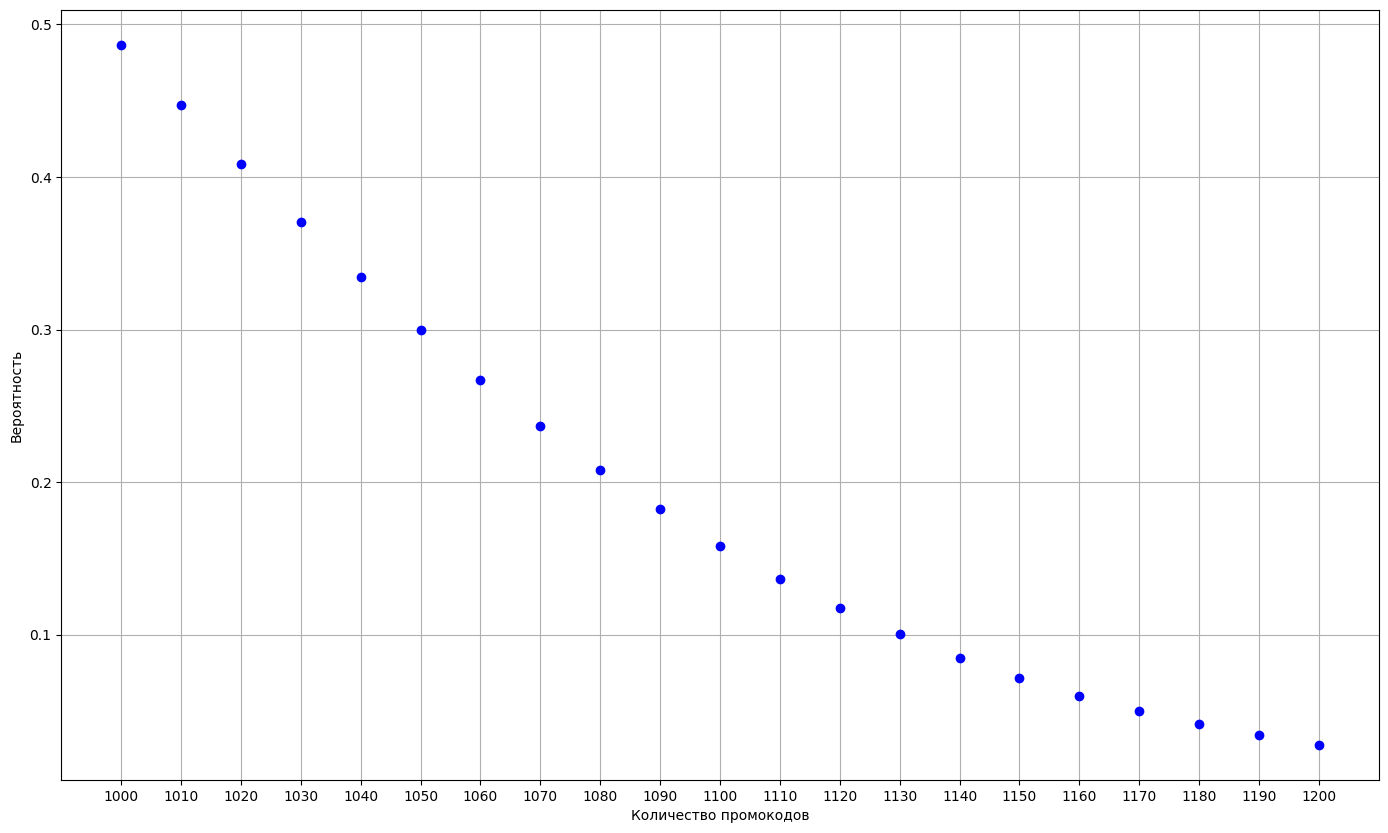

In [64]:
l_ver = [] # сюда будем собирать вероятности левого хвоста

# заполним список вероятностями
for i in range(1000, 1210, 10):
    v = poisson.cdf(x-1, i * p)
    l_ver.append(v)
 
# зададим размер графика
plt.figure(figsize=(17, 10))
# зададим график из полученных значений с о-образными точками синего цвета
plt.plot(range(1000, 1210, 10), l_ver, 'bo')
# добавим линии на график
plt.grid(True)
# название оси "x"
plt.xlabel('Количество промокодов')
# название оси "y"
plt.ylabel('Вероятность')
# используем значения от 1000 до 1210, через 10 как подписи для горизонтальной оси:
plt.xticks(range(1000, 1210, 10))
# отобразим график:
plt.show()

На графике видно, что вероятность 5% находится примерно в диапазоне между 1160 и 1180. Проверим данный промежуток подробнее.

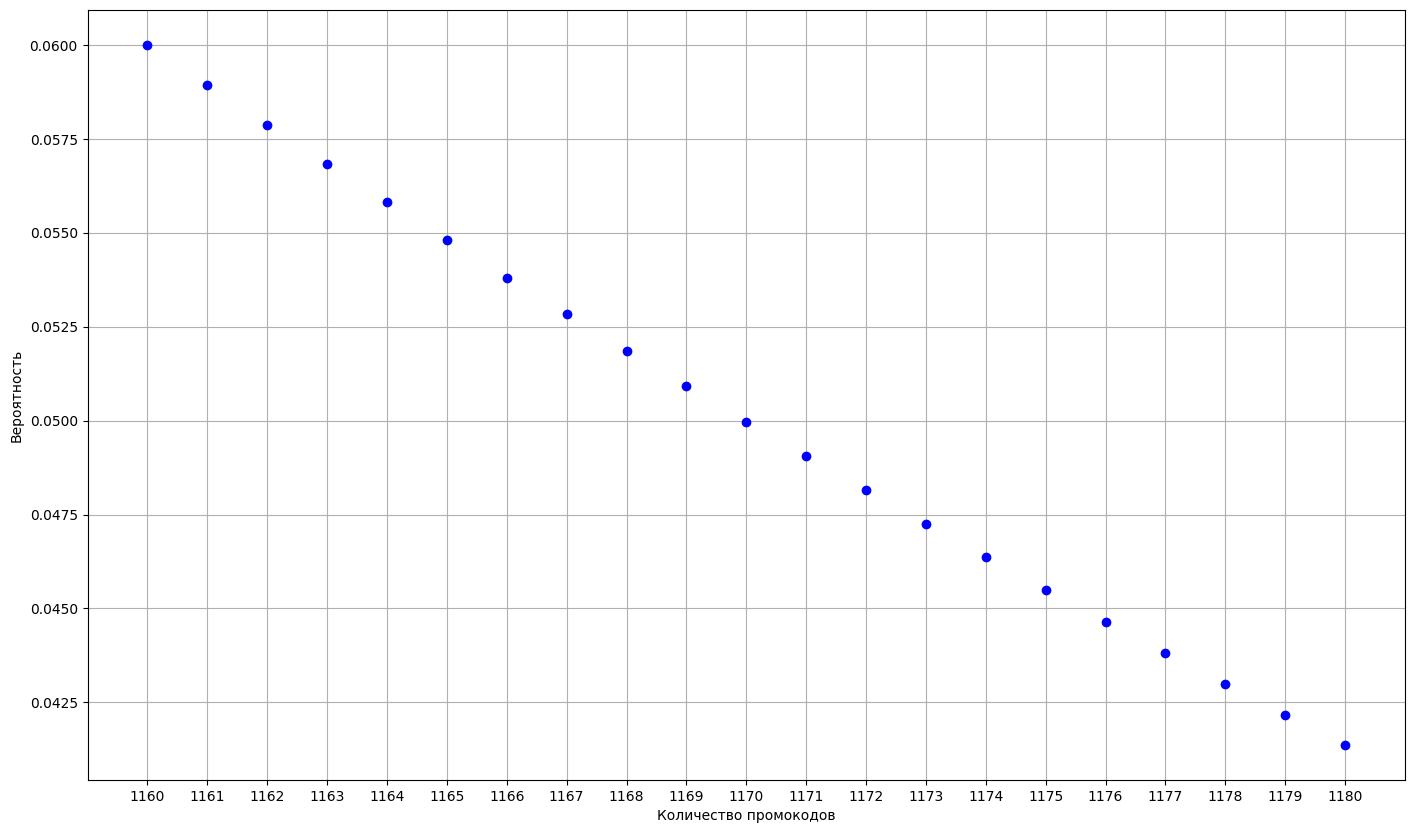

In [65]:
l_ver_1 = [] # сюда будем собирать вероятности левого хвоста

# заполним список вероятностями
for i in range(1160, 1181):
    v = poisson.cdf(x-1, i * p)
    l_ver_1.append(v)
 
# зададим размер графика
plt.figure(figsize=(17, 10))
# зададим график из полученных значений с о-образными точками синего цвета
plt.plot(range(1160, 1181), l_ver_1, 'bo')
# добавим линии на график
plt.grid(True)
# название оси "x"
plt.xlabel('Количество промокодов')
# название оси "y"
plt.ylabel('Вероятность')
# используем значения от 1000 до 1210, через 10 как подписи для горизонтальной оси:
plt.xticks(range(1160, 1181))
# отобразим график:
plt.show()

*Исследование показало, что для достижения вероятности недобрать 100 подписок равной 5%, или, другими словами, для достижения 95% вероятности успеха проводимой акции, необходимо раздать хотя бы 1170 промокодов.*

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. 
Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [66]:
# количество уведомлений
n_1 = 1000000
# вероятность положительного исхода
p_1 = 0.4
# граница
x_1 = 399500
# зададим лямбда
lmbd_1 = n*p

# проведем аппроксимацию, уменьшив значения в 1000 раз
n_1 = int(n_1 / 1000)
lmbd_1 = int(lmbd_1 / 1000)
x_1 = x_1 / 1000

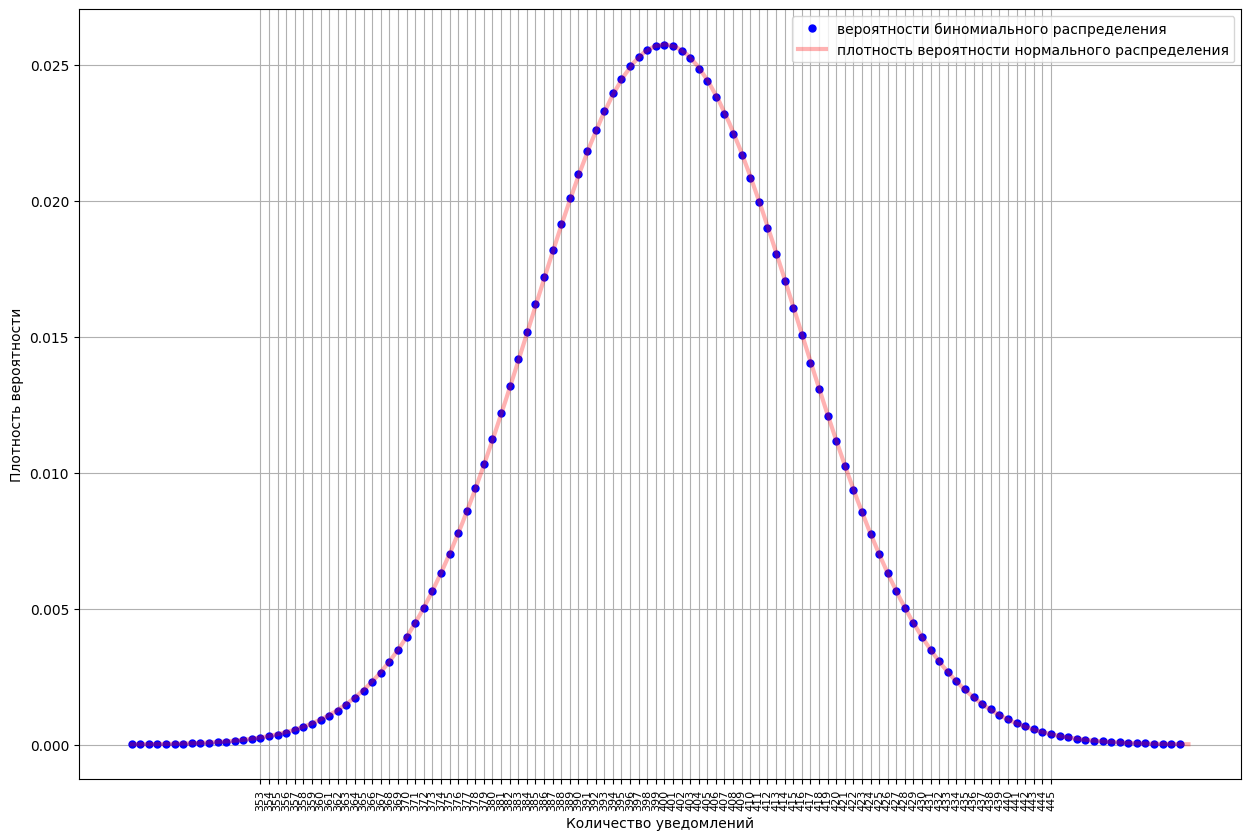

Условие выполняется


In [67]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(int(num)):
        result.append(start + step * i)
    return result

# границы промежутка, в котором будем строить аппроксимацию -
# от n_1*p_1 минус 4 ст.отклонения бином.распределения
# до n_1*p_1 плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n_1 * p_1 - 4 * sqrt(n_1 * p_1 * (1 - p_1)))
right = int(n_1 * p_1 + 4 * sqrt(n_1 * p_1 * (1 - p_1)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))

# зададим размер графика и линии
plt.figure(figsize=(15, 10))
plt.grid(True)

# рисуем график биномиального распределения
ax = plt.subplot()

# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n_1, p_1), 'bo', ms=5,
	      label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu_1 = n_1 * p_1
sigma_1 = sqrt(n_1 *p_1 * (1 - p_1))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu_1, sigma_1), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu_1 - 3 * sigma_1), int(mu_1 + 3 * sigma_1), 1))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.xlabel('Количество уведомлений')
plt.ylabel('Плотность вероятности')
plt.xticks(rotation=90)
plt.xticks(size = 8)
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu_1 - (3 * sigma_1) >= 0) and ((mu_1 + (3 * sigma_1) <= n_1)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

*Мы видим, что распределение абсолютно нормально.*

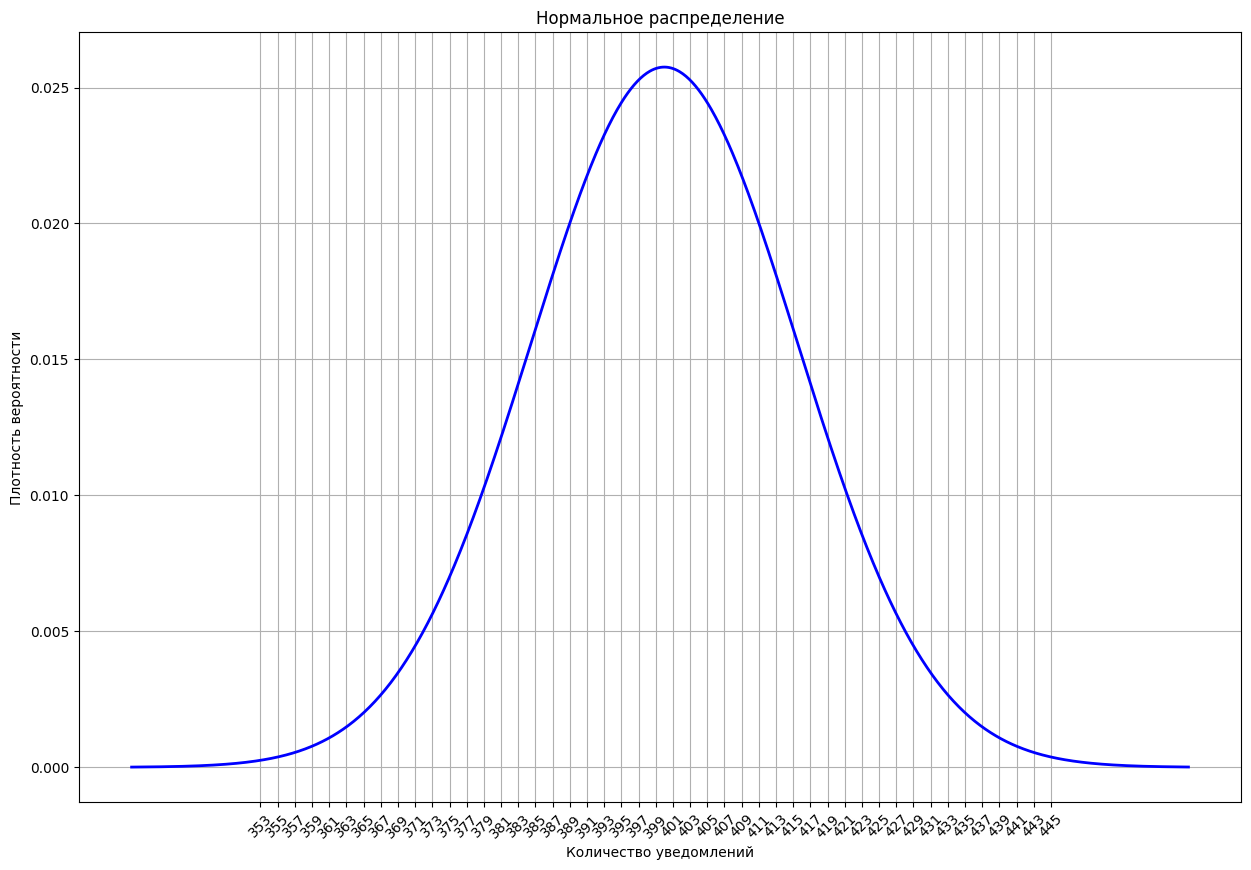

In [72]:
# границы промежутка, на котором будем строить график: mu плюс-минус 4 sigma
left = int(mu_1 - 4 * sigma_1)
right = int(mu_1 + 4 * sigma_1)

# рисуем график нормального распределения:
# получим список из 1000 чисел от left до right
x = linspace(left, right, 1000)

# используем синюю линию ширины 2
plt.figure(figsize=(15, 10))
plt.grid(True)
theplot = plt.subplot()
theplot.plot(x, norm.pdf(x, mu_1, sigma_1), 'b-', lw=2)
plt.title('Нормальное распределение')
plt.xlabel('Количество уведомлений')
plt.xticks(rotation=45)
plt.ylabel('Плотность вероятности')

# зададим подписи по оси x в пределах +- 3 ст.отклонений от мат.ожиданий
x_ticks = linspace(int(mu_1 - 3 * sigma_1), int(mu_1 + 3 * sigma_1), 3 * sigma_1 + 1)
x_ticks = list(map(lambda x: int(x), x_ticks))
theplot.set_xticks(x_ticks)

# отобразим график распределения
plt.show()

In [73]:
# найдем вероятность того, что уведомления откроют не более 399,5 тысяч
# пересчитаем mu_1 и sigma_1
mu_1_1 = n_1 * p_1 * 1000
sigma_1_1 = sqrt(n_1 * 1000 *p_1 * (1 - p_1))
x_1_1 = x_1 * 1000
 
# задаем нормальное распределение
dis = st.norm(mu_1_1, sigma_1_1)

# найдем вероятность
res = dis.cdf(x_1_1)
res

0.15371708296369768

*Исследование показало, что при рассылке 1 миллиона уведомлений и вероятности открытия сообщений 40%, вероятность того, что уведомления откроют не более 399,5 тысяч человек составляет порядка 15%.* 

В ходе исследования была применена *аппроксимация биномиального распределения нормальным*.

<a class='anchor' id='8-bullet'></a>
# ОБЩИЙ ВЫВОД

Проект "Статистический анализ данных" выполнен на основе данных из трёх источников, содержащих информацию о *пользователях, поездках и подписке.*

В ходе работы были проведены следующие работы и выведены выводы:

1. Загрузка данных их трёх источников в три датафрейма:
   * *data_users* - данные о пользователях содержат 5 столбцов и 1565 строк, из которых 0 пропусков. Типы данных: "int64" и "object".

   * *data_riders* - данные о пользователях содержат 4 столбца и 18068 строк, из которых 0 пропусков. Типы данных: "int64" и "float64".

   * *data_sub* - данные о пользователях содержат 4 столбца и 2 строки, из которых 0 пропусков. Типы данных: "int64" и "object".
  
  
2. Данные во всех трёх датафреймах были предобработаны, а именно, изменен тип данных в столбце "data_riders" для удобства работы, создан новый столбец с номерами месяцев и удалены дубликаты в датафрейме "data_users" в количестве 31 строки. 
*В целом данные были несильно засорены!*

3. На этапе исследовательского анализа данных было проведено исследование частоты встречаемости городов, соотношения количества пользователей с подпиской и без, возраста пользователей, расстояния и продолжительности поездок. Получились следующие характеристики сервиса:

   - Результаты показали, что сервис популярнее в городах, удаленных от Москвы и Питера - это Пятигорске и Екатеринбурге (14.3% и 13.3% от общего числа соответственно). Москва же заняла последнее место, а Питер и вовсе в списке отсутствует. *Можно смело сделать  вывод, что сервис ориентирован на периферию.*
   
   - *54.4% на 46.6%. Такую структуру имеет массив пользователей с подпиской и без, в пользу первых.*
   
   - *Наиболее часто можно встретить пользователя возрастов от 20 до 30 лет.*
   
   - *В среднем пользователи преодолевают чуть больше 3000 метров.*
   
   - *Средняя продолжительность поездки находится в районе 17 минут.*
   
   
4. Исследовать данные о времени и расстоянии поездок для пользователей с подпиской и без помогло создание общего датафрейма и разделение его на два - есть/нет подписки. Отличительные особенности были найдены:

   - *С подпиской пользователи в среднем проезжают большее расстояние - 3115 метров против 3045 метров у пользователей без подписки. Также, стоит отметить разные дисперсии, у пользователей без подписки она больше, что свидетельствует о том, что пользователи с подпиской отличаются большей стабильностью в выборе расстояния поездки.*
   
   - *Исследование продолжительности поездок ожидаемо показало для пользователей с подпиской большую среднюю продолжительность (18.5 минут против 17.3 минут) и меньшее среднее отклонение (5.57 против 6.32).* Все логично, пользователи с подпиской более активны и стабильны в пользовании сервисом.
   
   
5. Создан датафрейм "data_trip" с данными о сумме расстояний и продолжительности поездок, а также их количестве для каждого пользователя помесячно.


6. В данном разделе были проверены 3 гипотезы:

   - *Средняя продолжительность поездки подписчиков больше, чем у пользователей без подписки* - **Нулевая гипотеза ОТВЕРГНУТА. Подписчики действительно тратят больше времени на поездки.**
   - *Подписчики в среднем проезжают больше расстояния, называемого оптимальным с точки зрения износа самокатов и равное 3130 метров* - **Нулевая гипотеза НЕ ОТВЕРГНУТА. Подписчики действительно проезжают менее 3130 метров.**
   - *Средняя выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки* - **Нулевая гипотеза ОТВЕРГНУТА. Подписчики действительно приносят больше помесячной выручки.**

А также, был описан тест, необходимый для проверки гипотезы о снижении среднего значения генеральной совокупности после проведения некоторых обновлений, а именно, описан метод проверки гипотезы для зависимых (парных) датафреймов.

*Итак, согласно проверкам гипотез, можно предположить, что* **Подписчики в среднем проезжают меньше расстояния, называемого оптимальным с точки зрения износа самокатов и равное 3130 метров, средняя продолжительность их поездок и выручка в месяц больше, чем у пользователей без подписки.**
   
   
7. - В данном пункте было выяснено, что минимальное количество промокодов, необходимое для 95% вероятности достижения необходимых 100 новых подписок, равно 1170 (при положительной вероятности равной 10%). В ходе работы была использована аппроксимация биномиального распределения распределением Пуассона и построен график распределения.

   - Также в данном пункте было выяснено, что при рассылке 1 миллиона уведомлений и вероятности открытия сообщений 40%, вероятность того, что уведомления откроют не более 399,5 тысяч человек составляет порядка 48%. В ходе исследования была применена *аппроксимация биномиального распределения нормальным*, построен график нормального распределения.


**Итак, можно смело сделать вывод, что пользователи с подпиской более предпочтительны для сервиса. Они проезжают большее расстояние, (при этом не превышая границы оптимального расстояния с точки зрения износа самоката), их поездки носят более стабильный и продолжительный характер, да и выручку они приносят больше.**